In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import torch
from torch import optim, nn
from math import exp

import numpy as np

from tqdm import tqdm
from random import randint

from load_dataset import load_dataset, plot_image, save_image
from auto_encoder2 import PAutoE

device = "cpu"

pimages = load_dataset().to(device)

In [2]:
T = 1000
beta = torch.linspace(10e-4, 0.02, T, device=device)

alpha = 1 - beta

alpha_ = torch.zeros(T, device=device)

for i in range(T):
    alpha_[i] = torch.prod(alpha[0:i+1])

alpha_[-1]

tensor(2.5652e-05)

In [3]:
torch.sqrt(1 - alpha_[-1])

tensor(0.9999, device='cuda:0')

In [4]:
torch.sqrt(1-alpha_[49])

tensor(0.9999, device='cuda:0')

In [6]:
torch.sqrt(alpha_[-1])

tensor(0.0150, device='cuda:0')

In [2]:
pimages[1][251]

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [3]:
from IPython.display import clear_output

pkm = 0
tt = 696

models = []
for t in range(tt):
    models.append(torch.jit.load(f"./M/model_{t}.pt").eval().to(device))

for i in range(50):
    z = torch.randn((3,64,64), device=device)
    x = torch.sqrt(alpha_[tt-1]) * pimages[1][pkm] + torch.sqrt(1-alpha_[tt-1]) * z
    for t in reversed(range(tt)):

        z = torch.randn((3,64,64), device=device) 
        e = models[t](x[None])[0] * (1 - alpha[t]) / torch.sqrt(1 - alpha_[t])

        x = (1 / torch.sqrt(alpha[t])) * (x - e) + z * torch.sqrt(beta[t])
        #x.clamp(0,1)

        #if t % 5 == 0:
        #    clear_output(wait=True)
        #    plot_image(x)

    #clear_output(wait=True)
    plot_image(x)
#plot_image(pimages[1][pkm])

KeyboardInterrupt: 

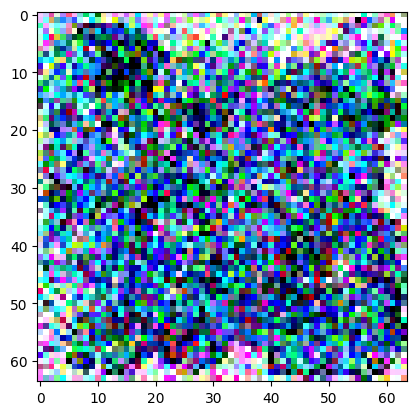

In [ ]:
from IPython.display import clear_output

pkm = 251
tt = 955

z = torch.randn((3,64,64), device=device)
x = torch.sqrt(alpha_[tt-1]) * pimages[1][pkm] + torch.sqrt(1-alpha_[tt-1]) * z
#x = z

for t in reversed(range(tt)):

    model = torch.jit.load(f"./M/model_{t}.pt").eval().to(device)

    z = torch.randn((3,64,64), device=device) 
    e = model(x[None])[0] * (1 - alpha[t]) / torch.sqrt(1 - alpha_[t])

    x = (1 / torch.sqrt(alpha[t])) * (x - e) + z * torch.sqrt(beta[t])
    #x.clamp(0,1)

    if t % 5 == 0:
        clear_output(wait=True)
        plot_image(x)

#clear_output(wait=True)
plot_image(x)
#plot_image(pimages[1][pkm])

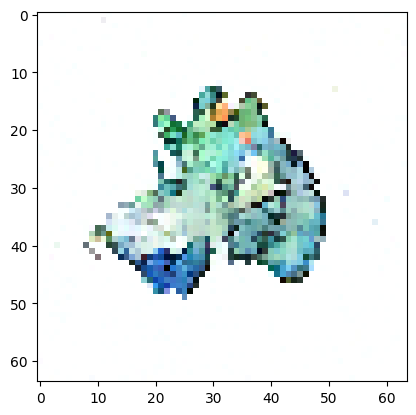

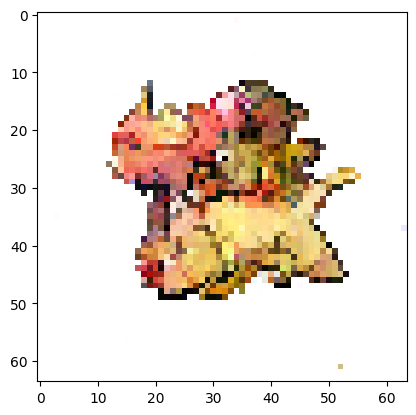

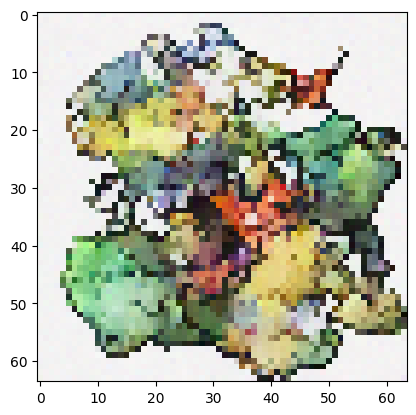

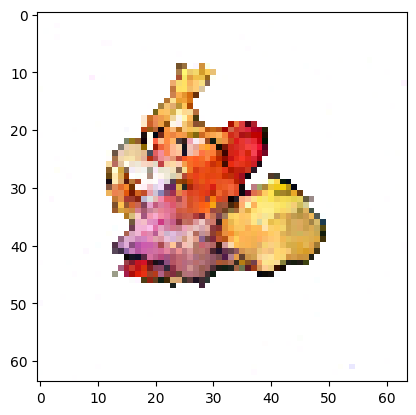

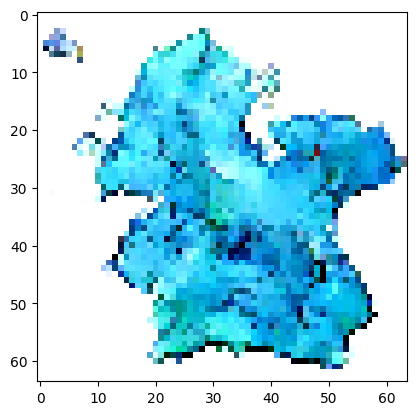

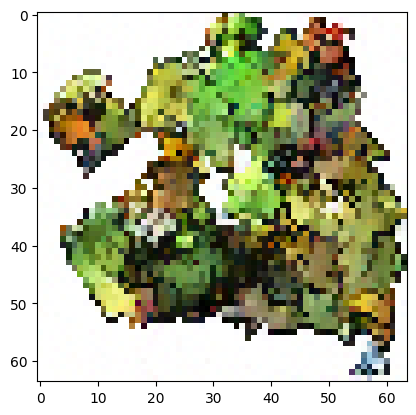

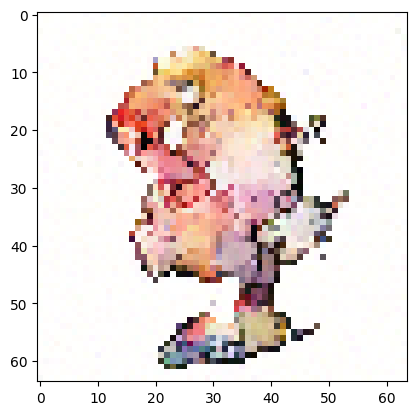

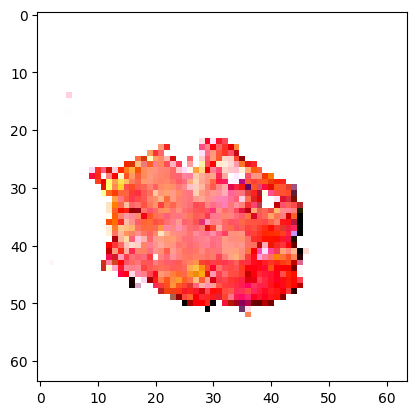

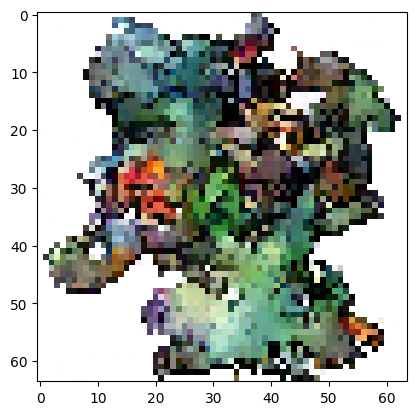

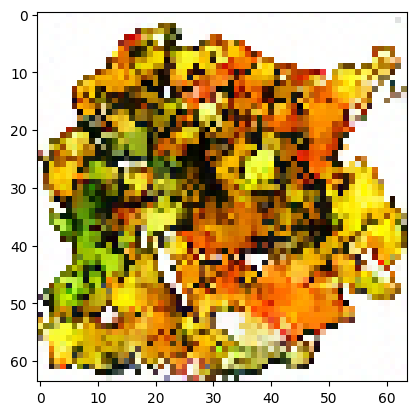

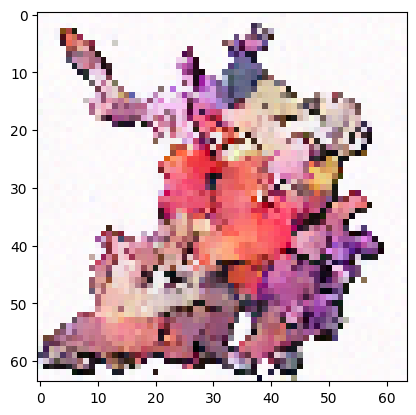

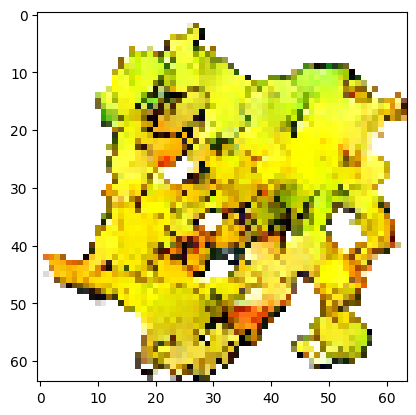

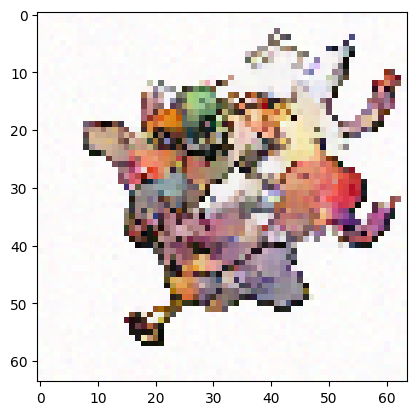

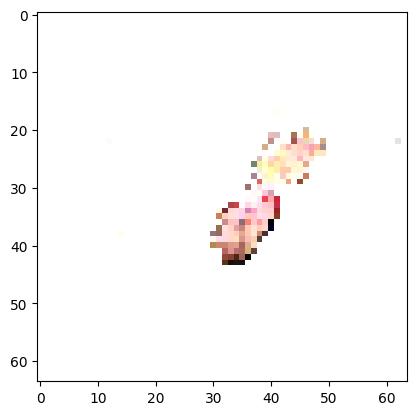

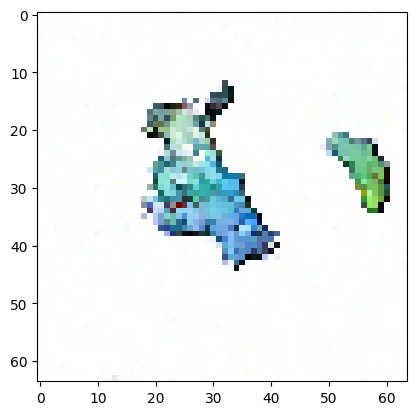

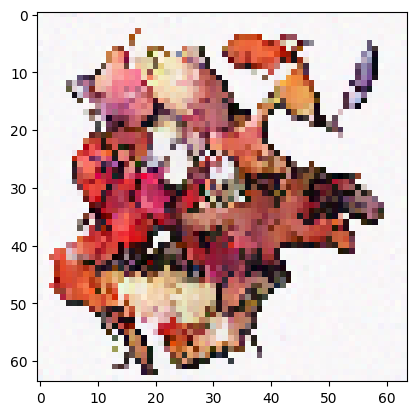

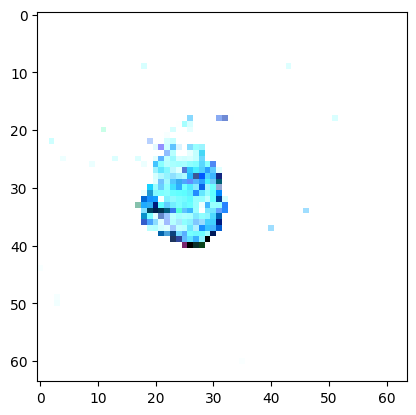

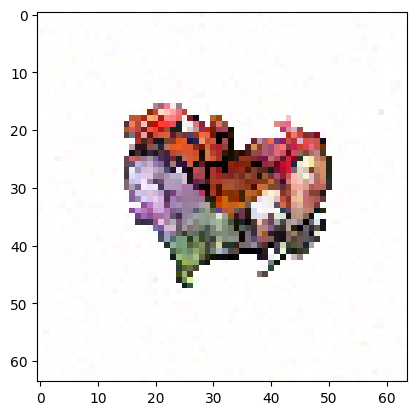

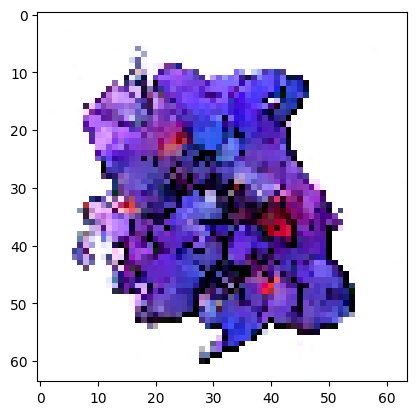

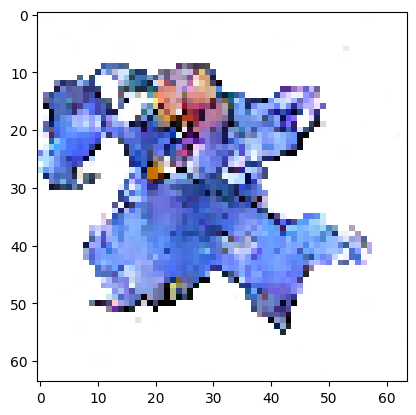

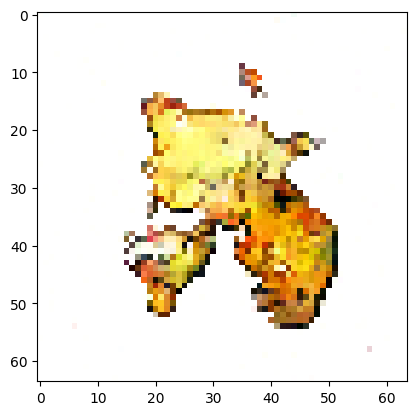

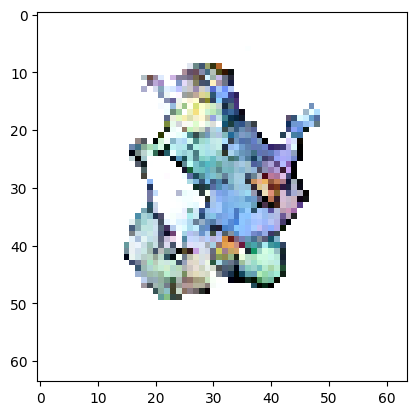

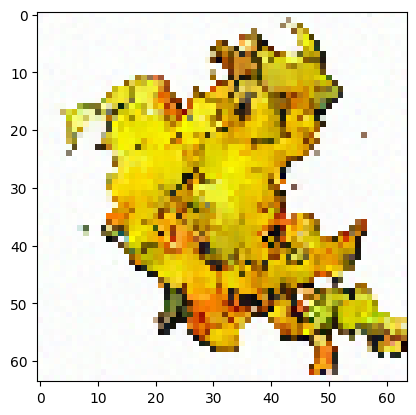

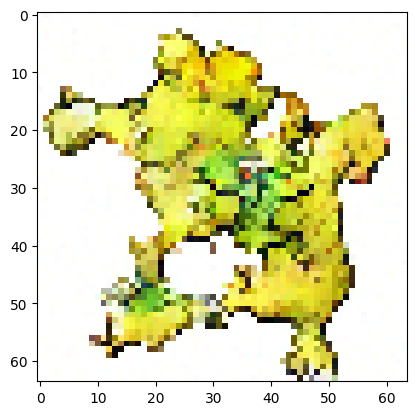

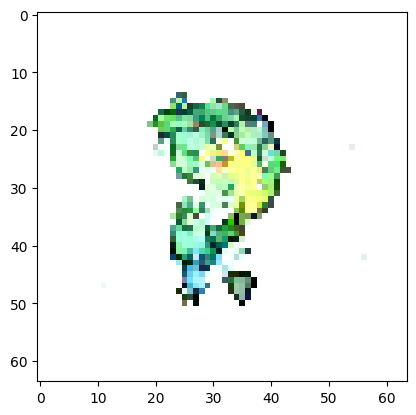

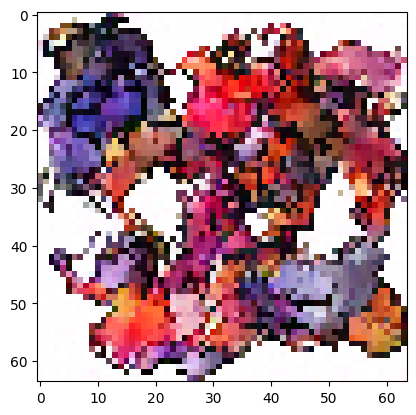

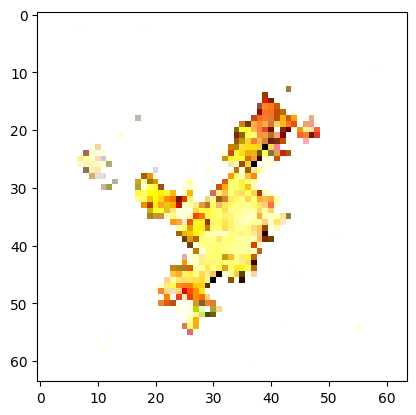

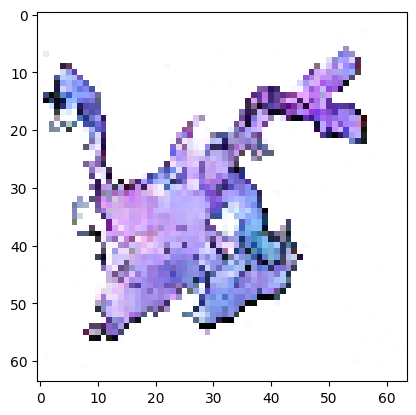

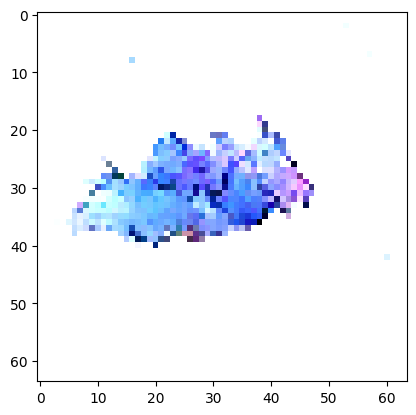

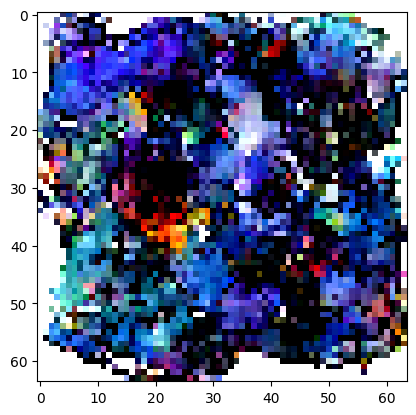

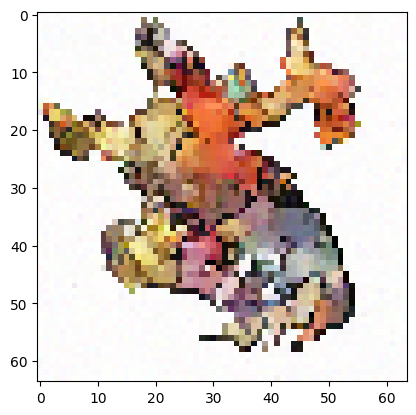

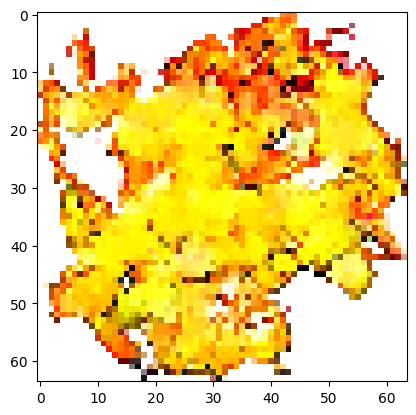

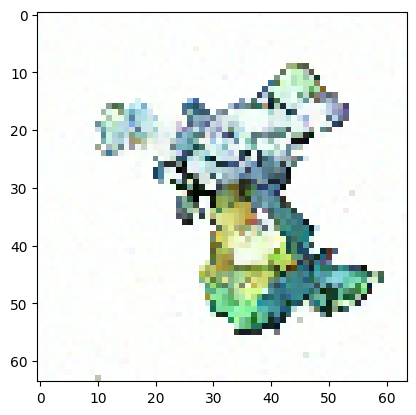

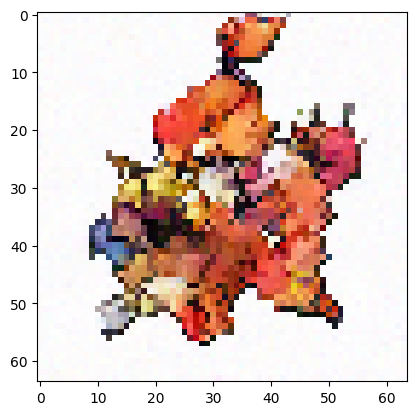

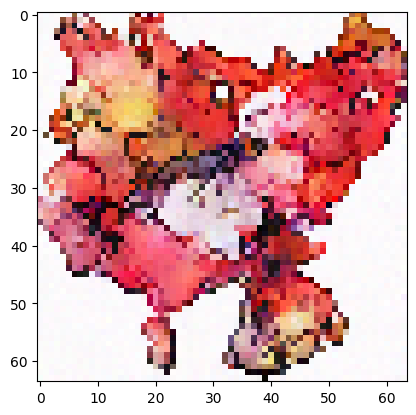

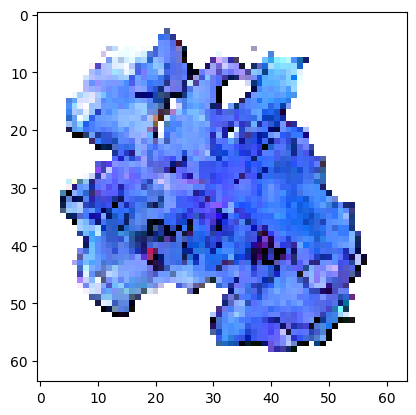

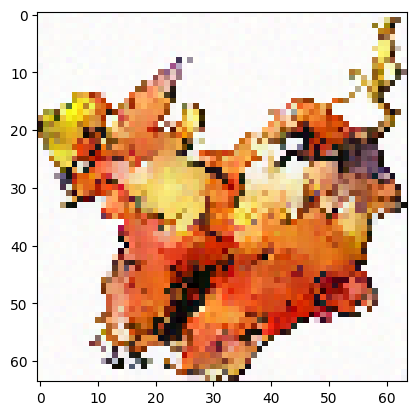

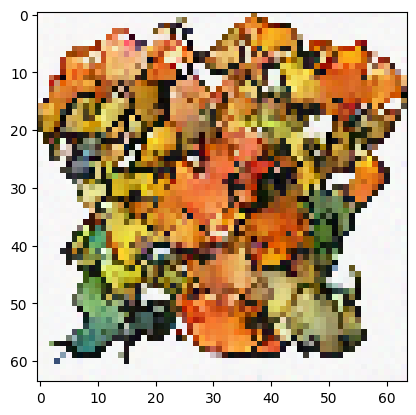

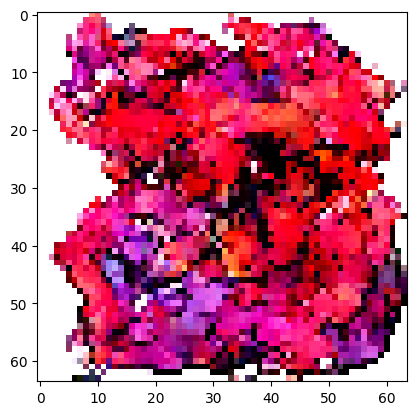

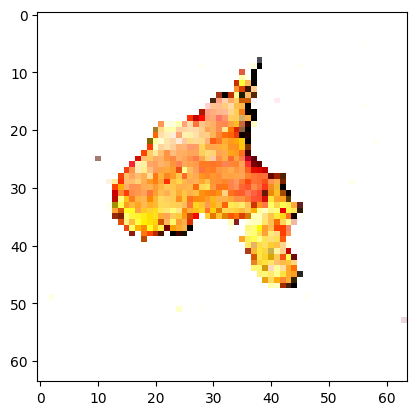

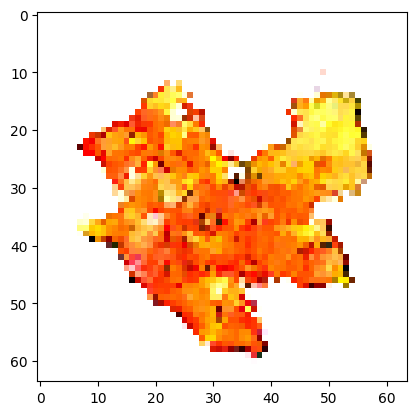

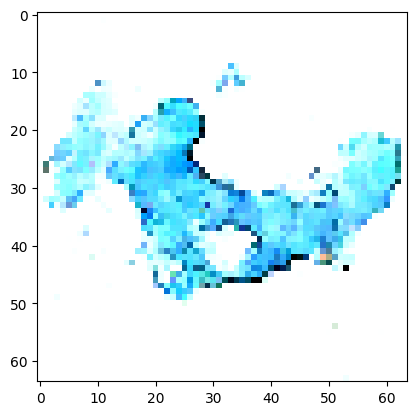

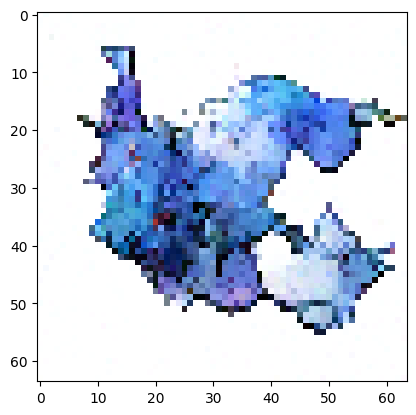

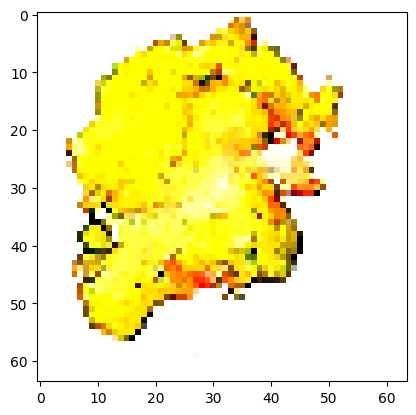

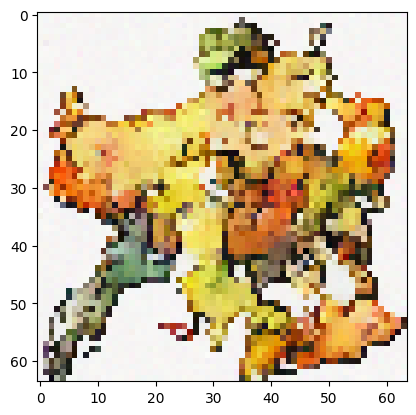

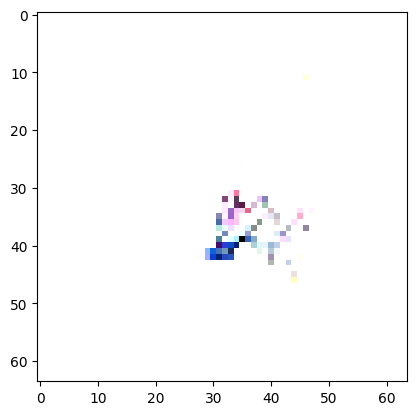

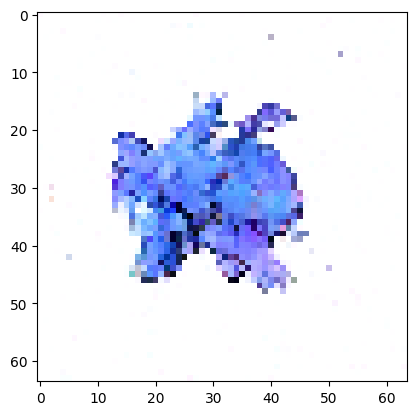

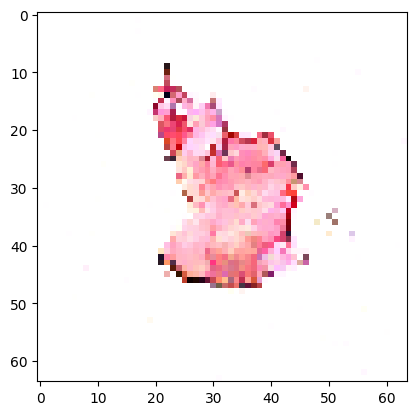

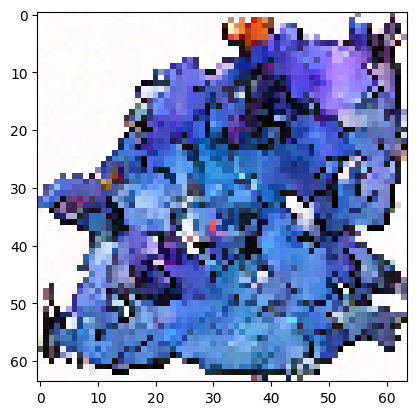

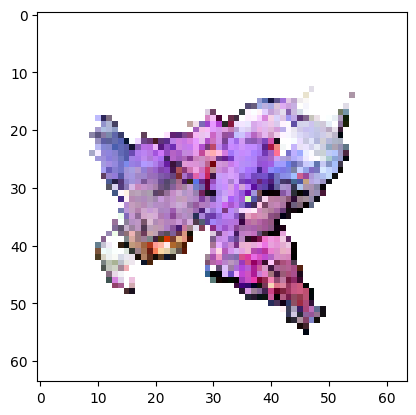

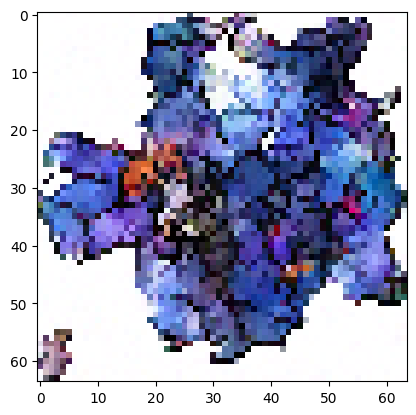

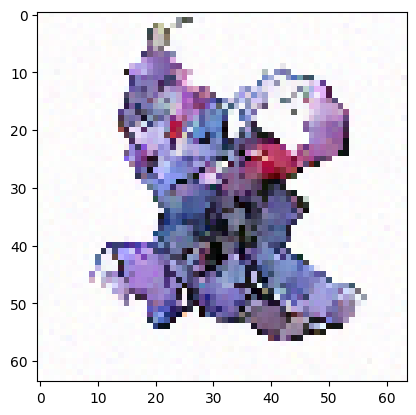

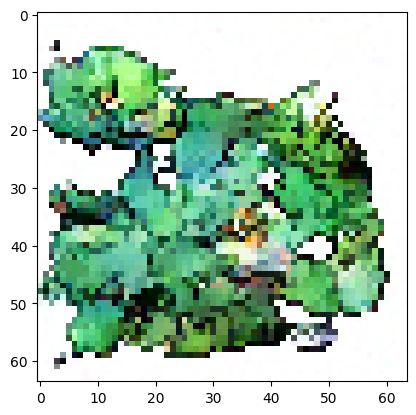

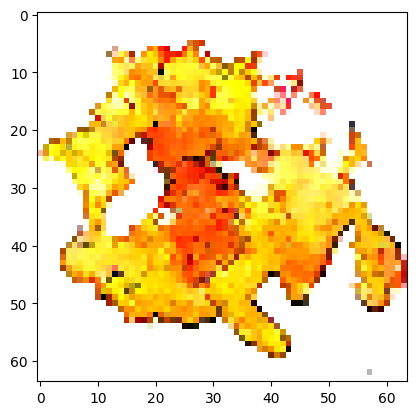

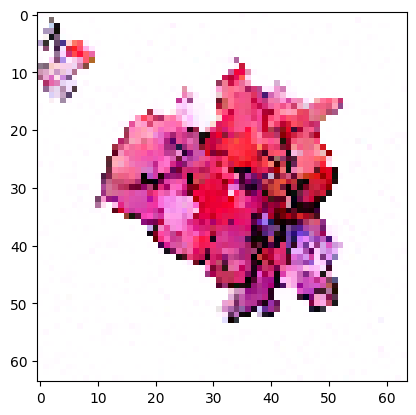

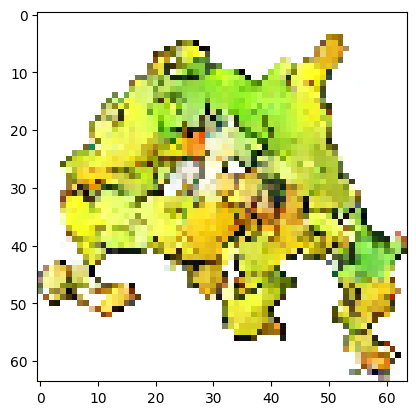

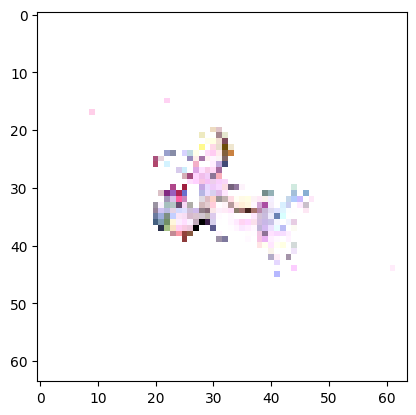

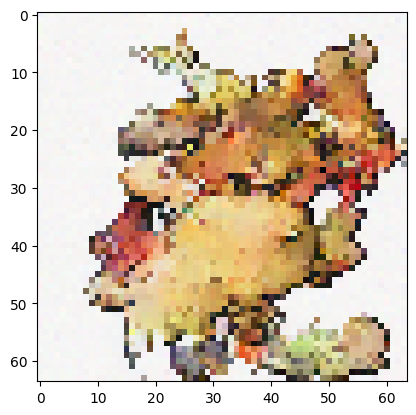

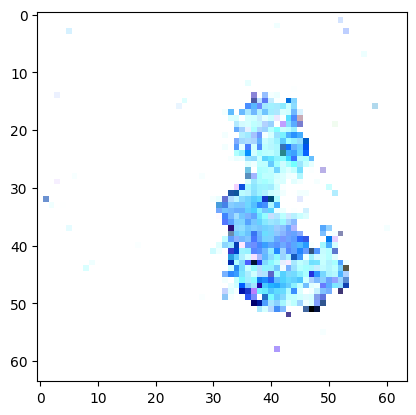

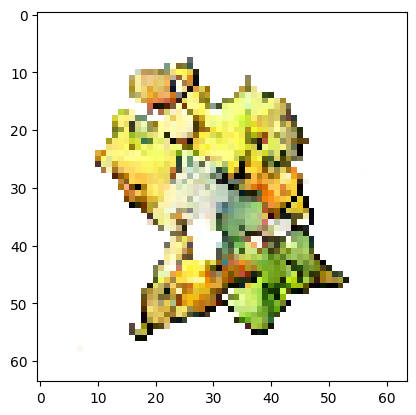

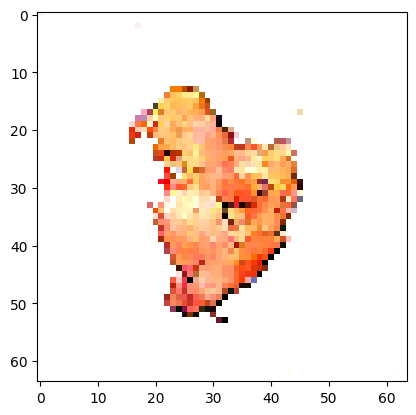

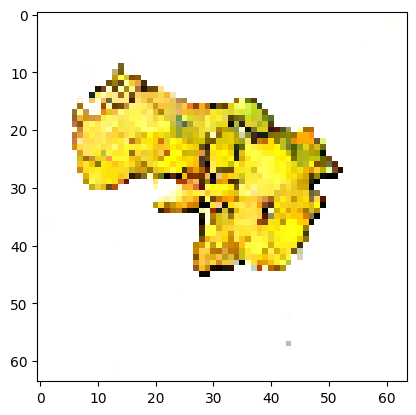

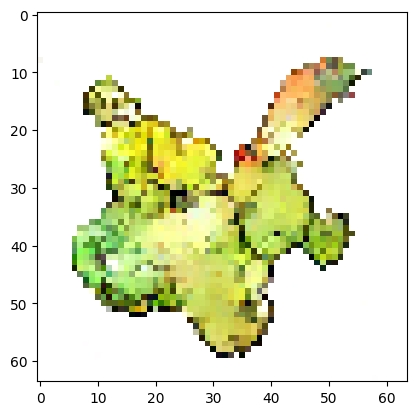

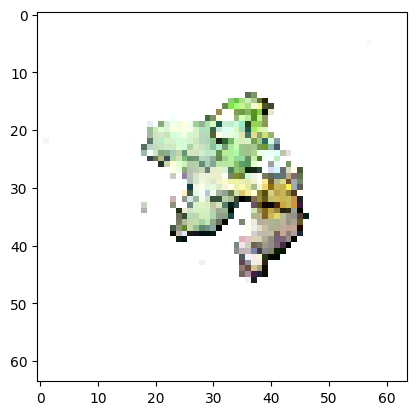

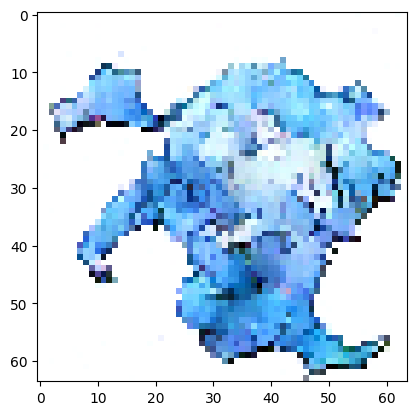

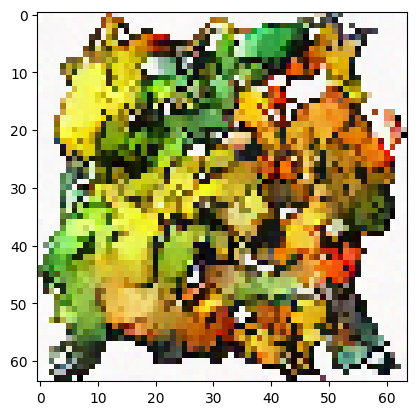

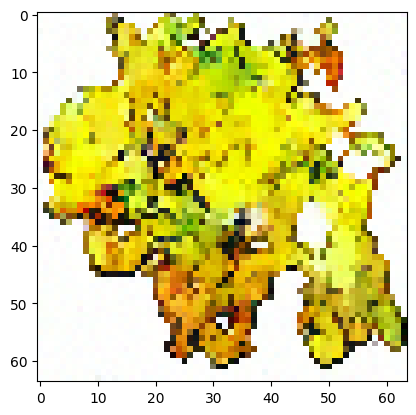

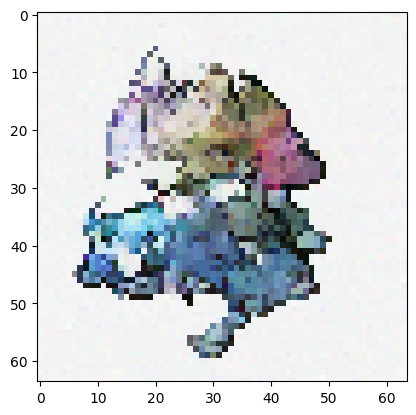

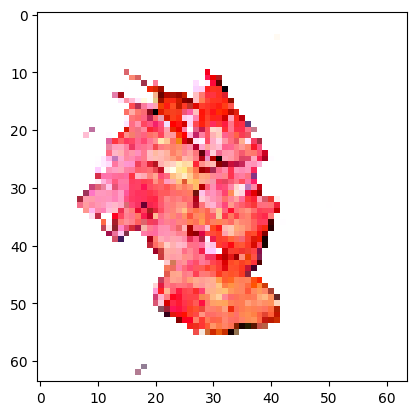

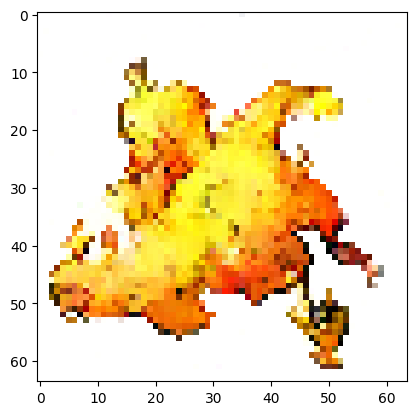

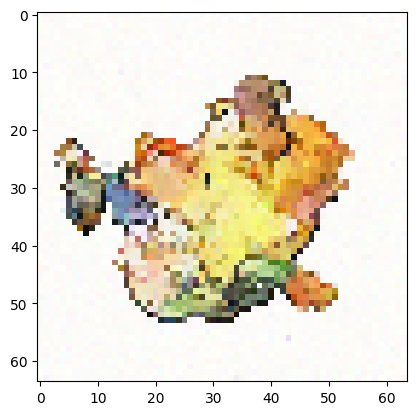

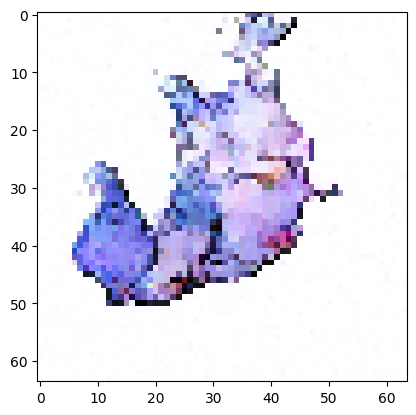

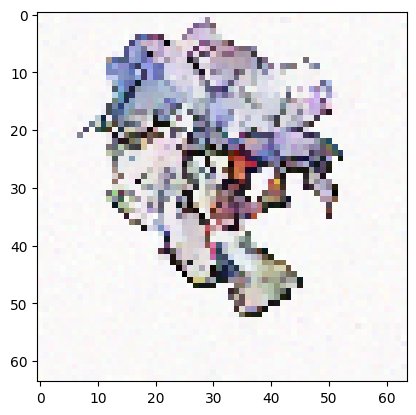

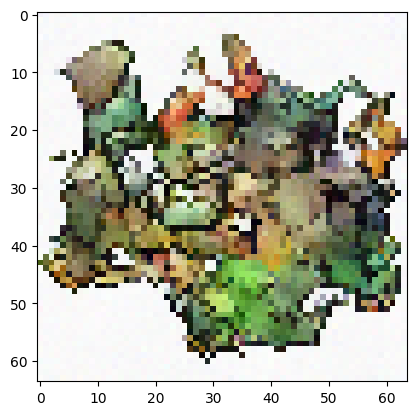

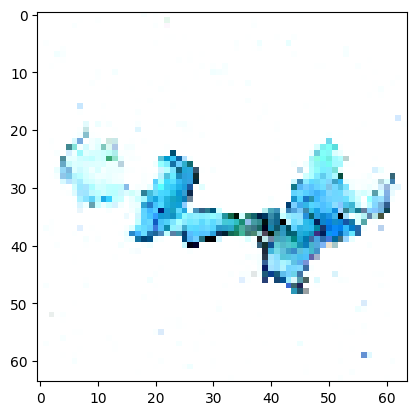

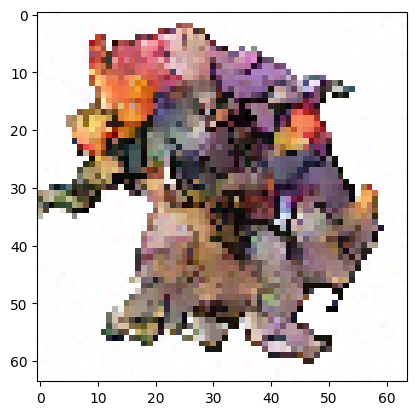

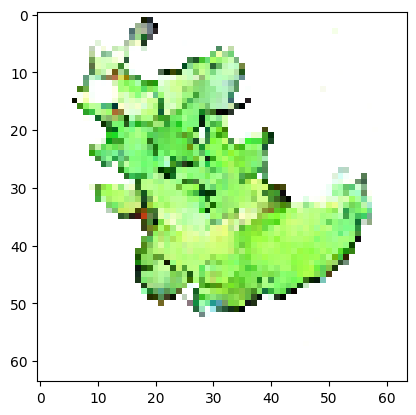

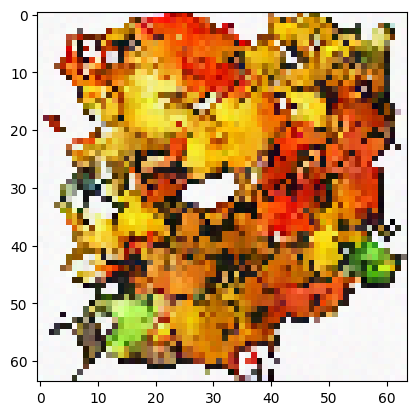

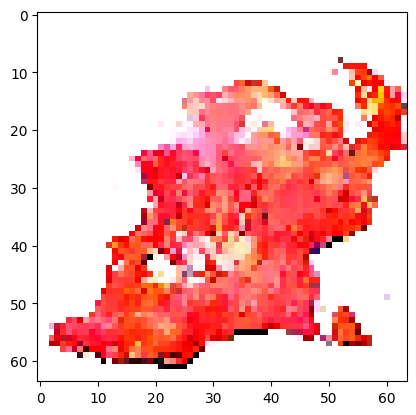

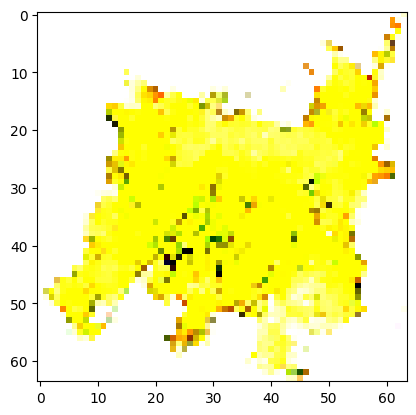

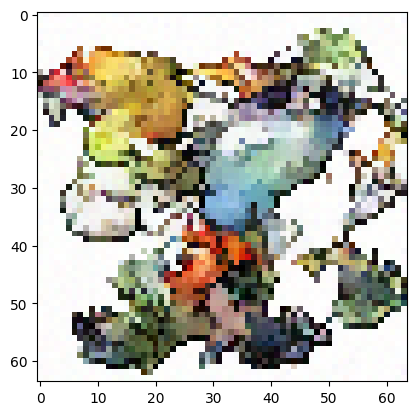

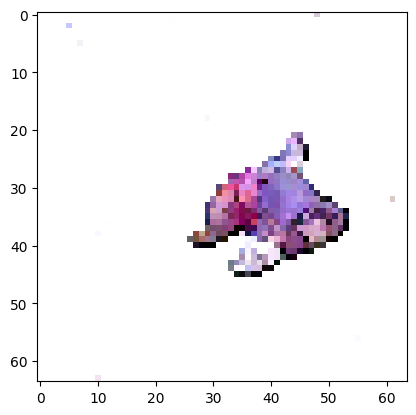

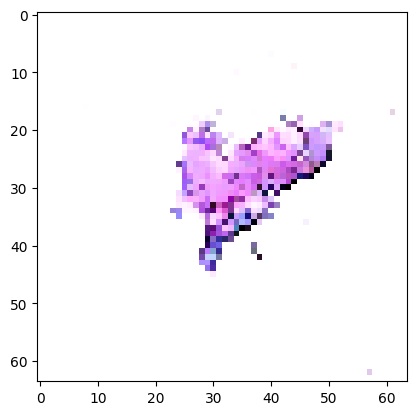

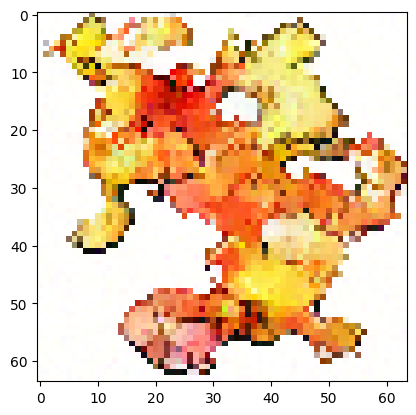

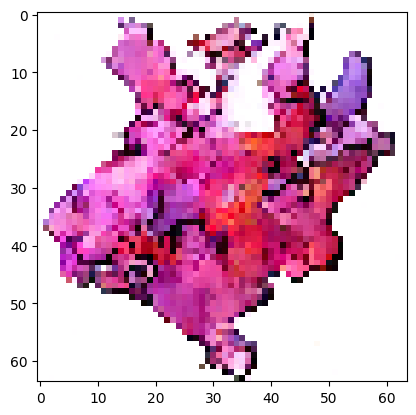

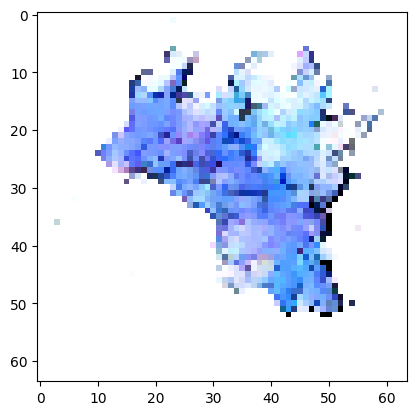

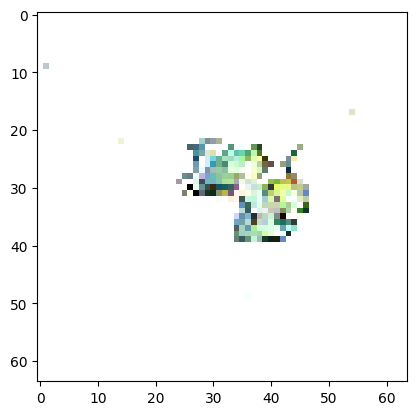

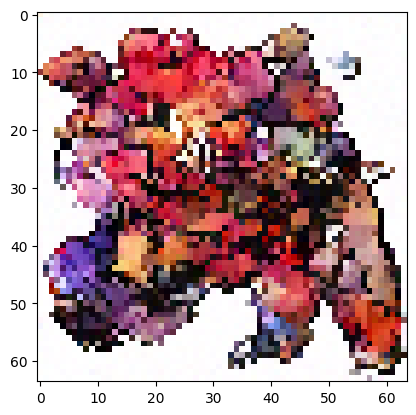

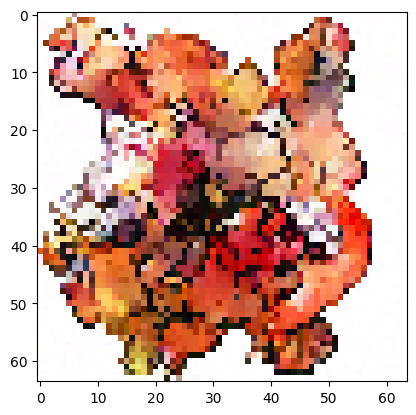

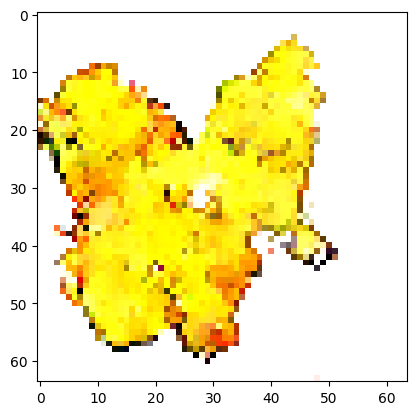

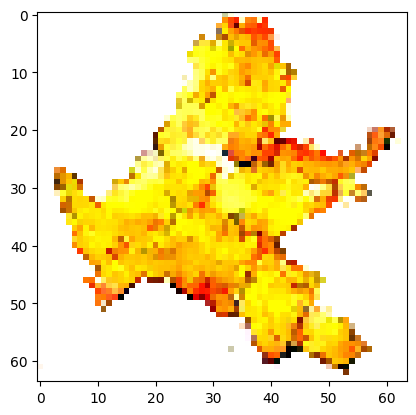

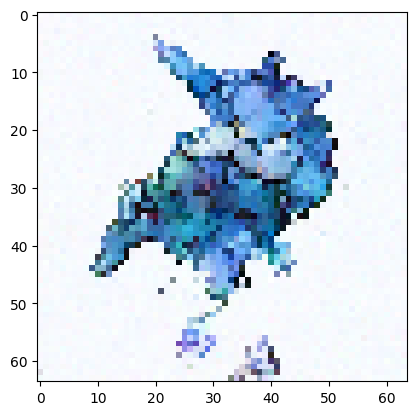

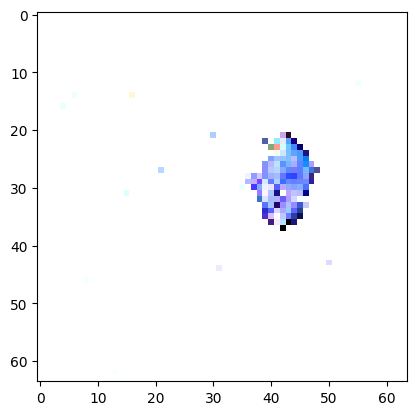

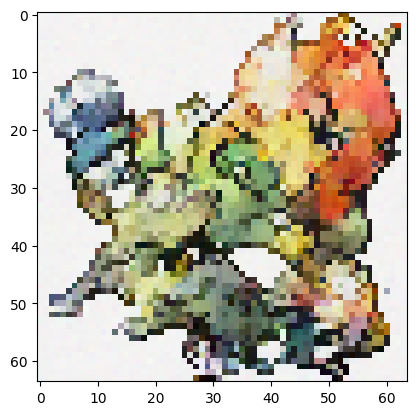

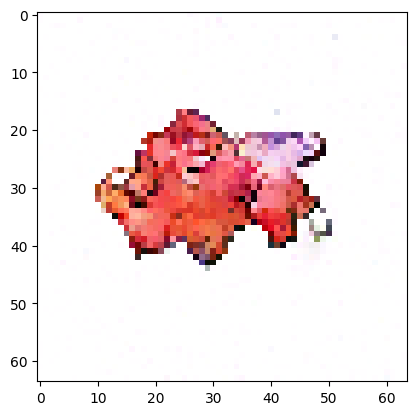

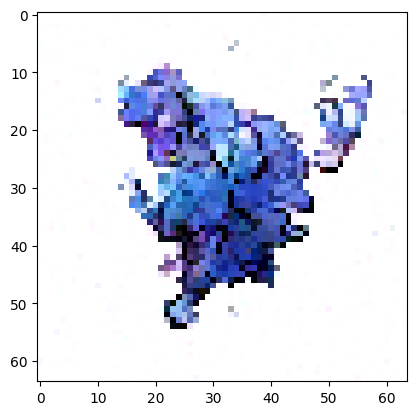

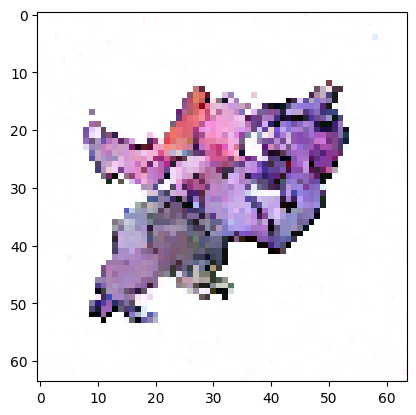

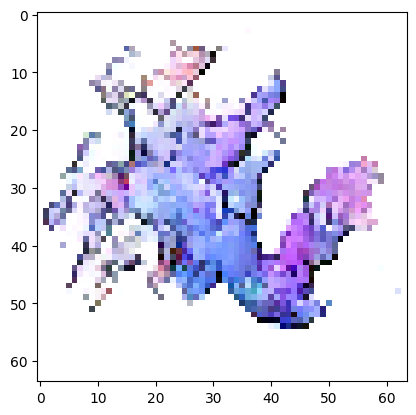

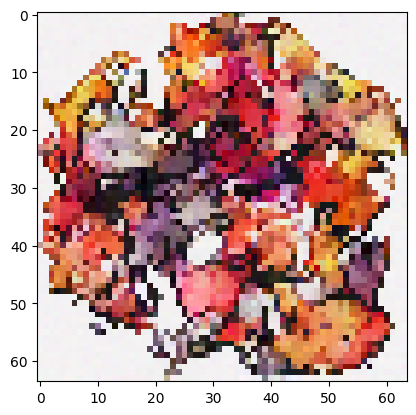

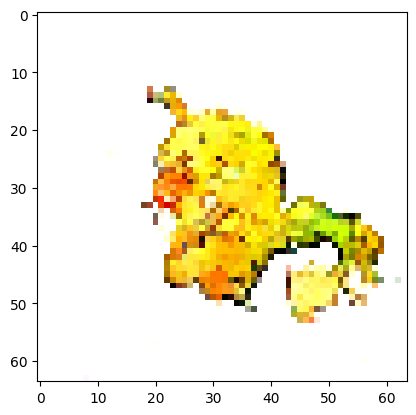

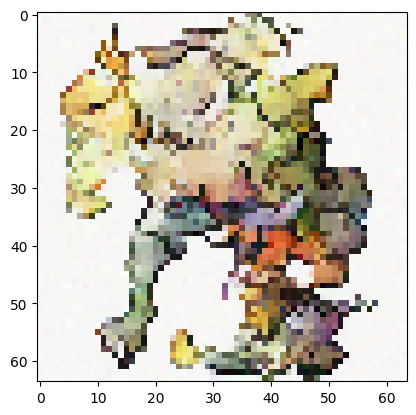

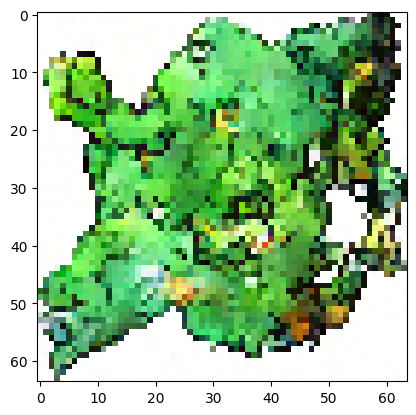

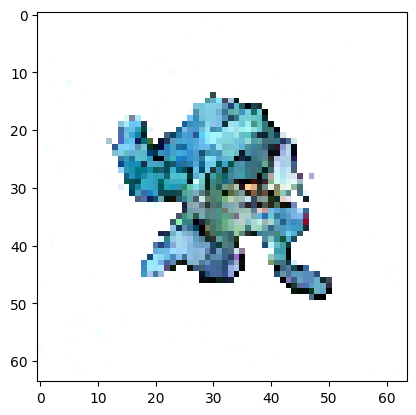

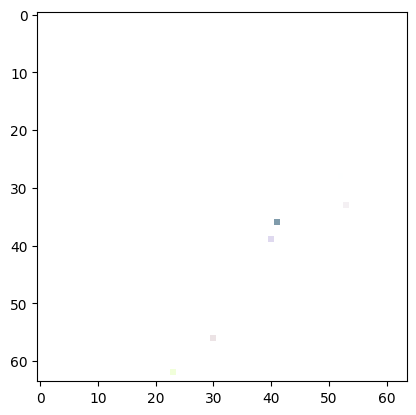

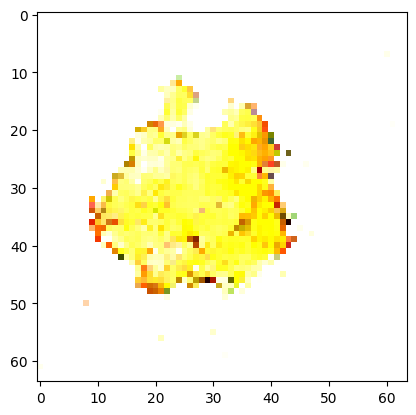

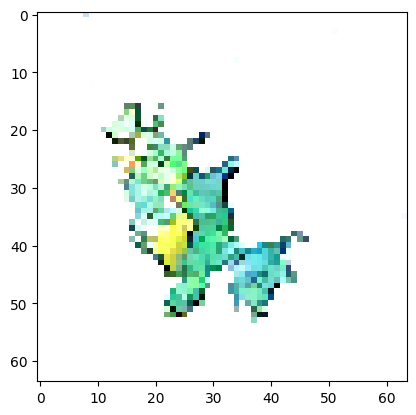

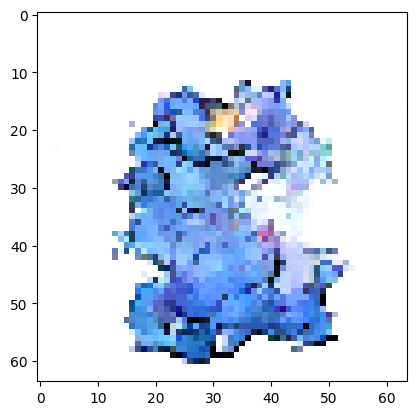

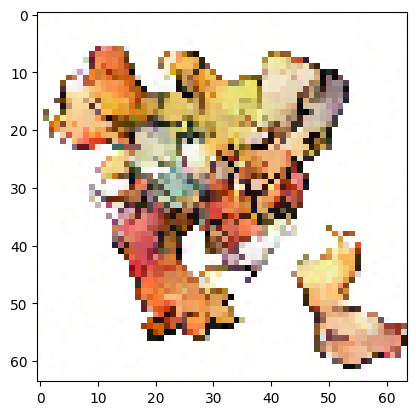

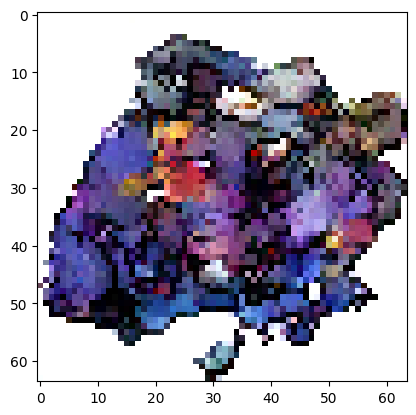

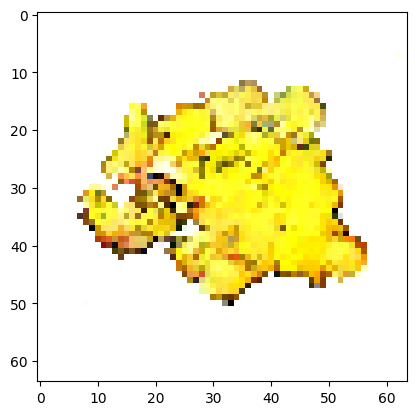

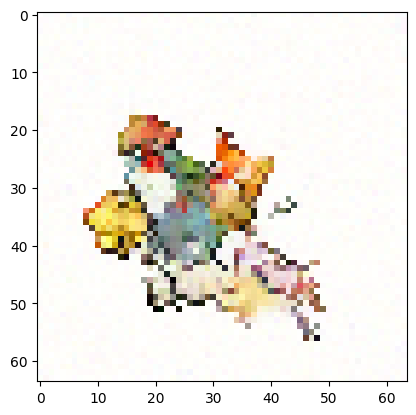

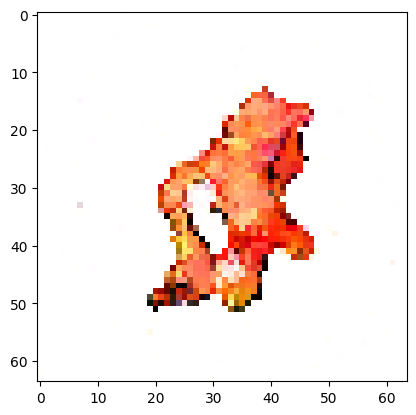

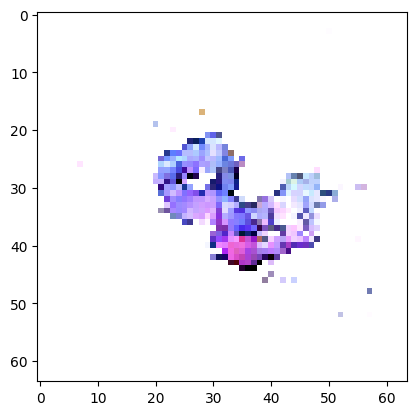

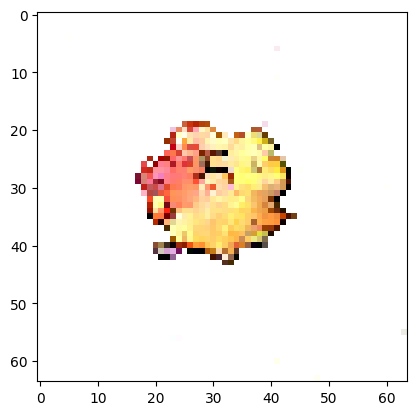

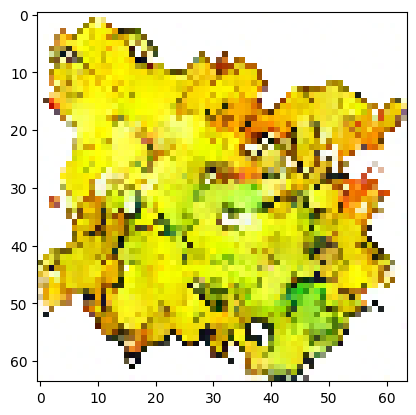

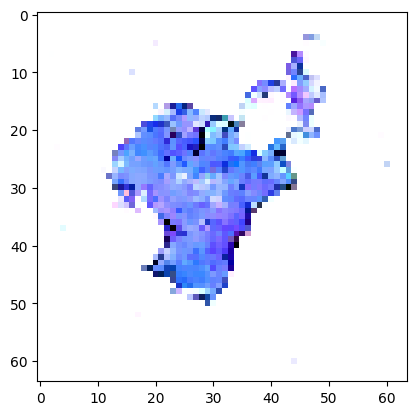

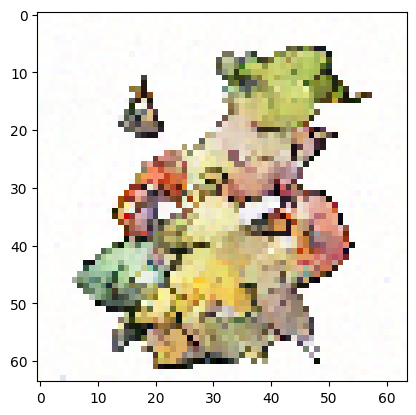

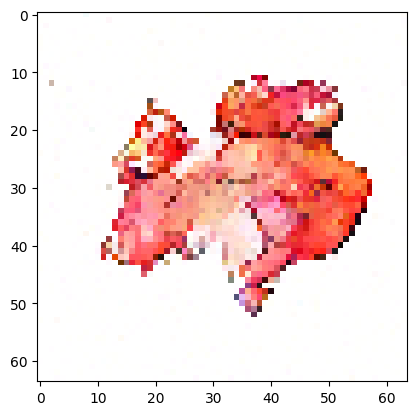

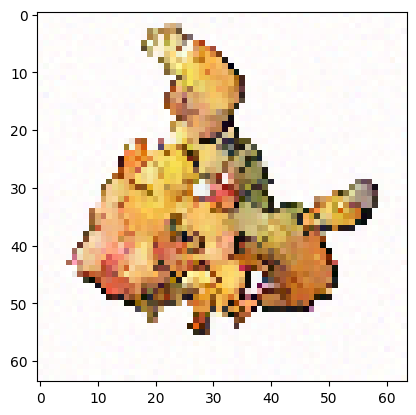

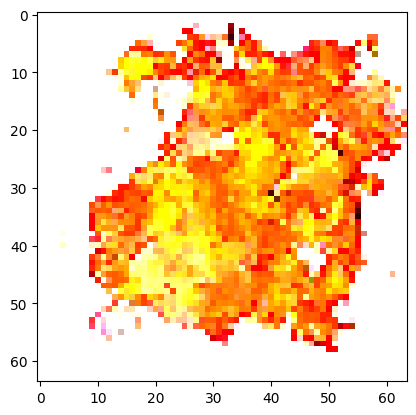

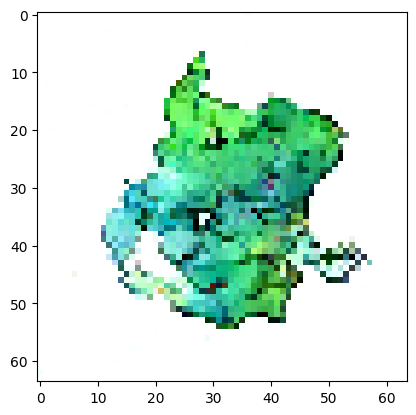

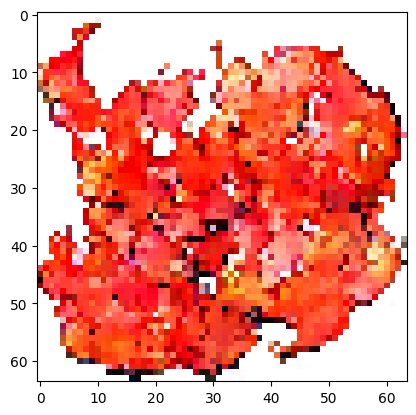

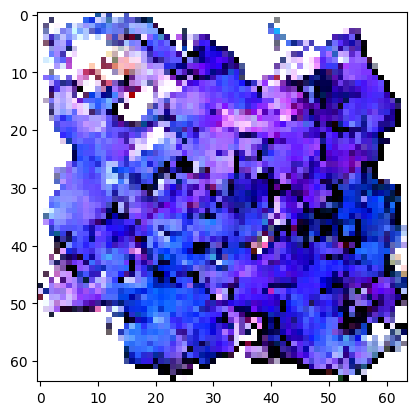

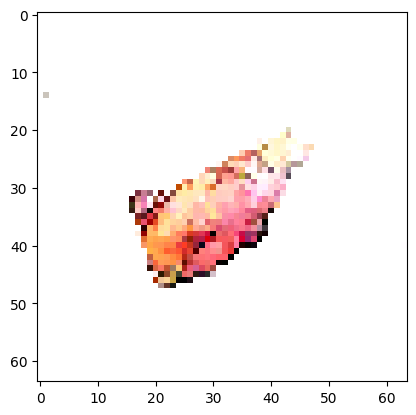

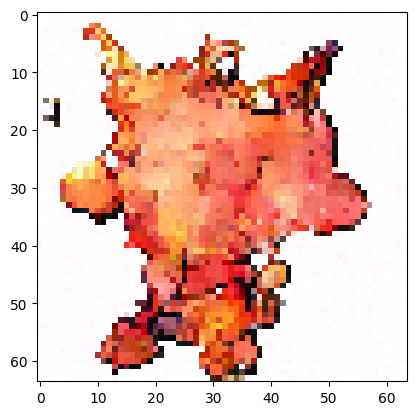

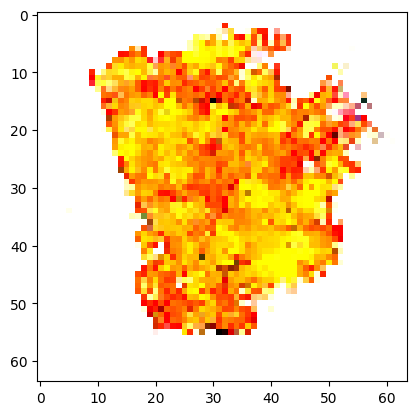

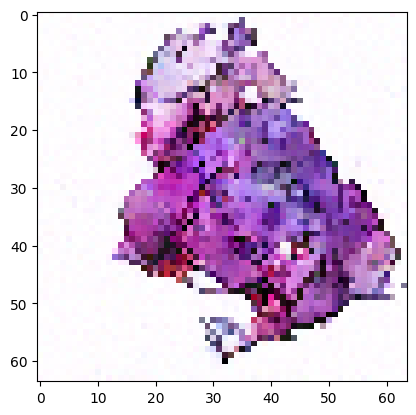

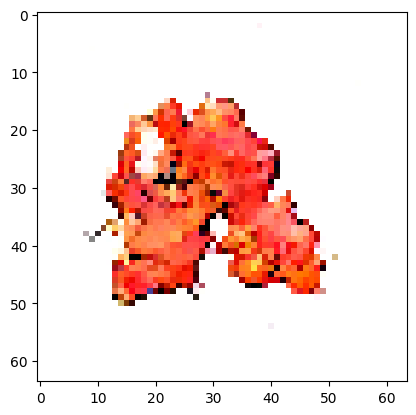

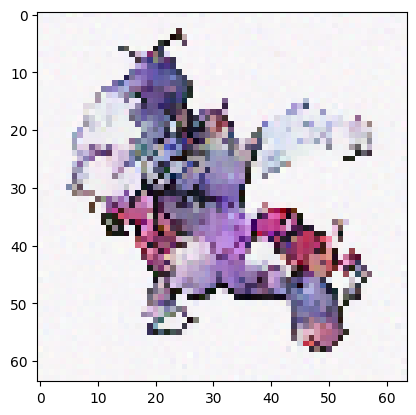

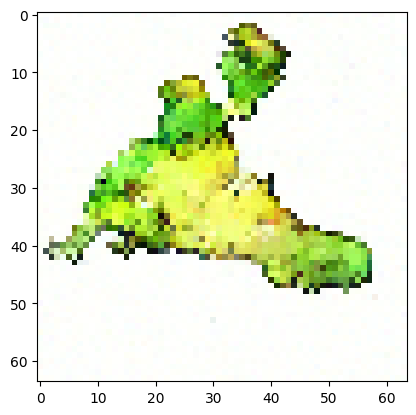

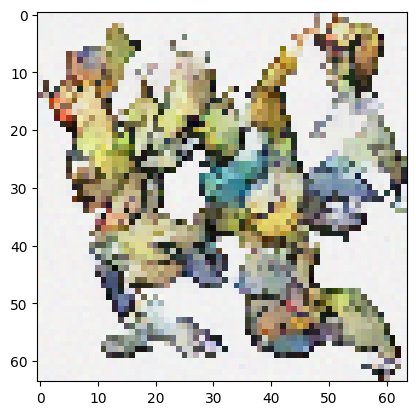

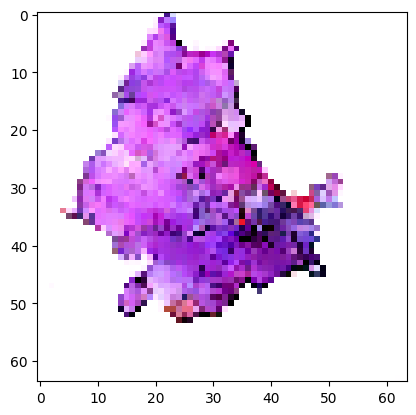

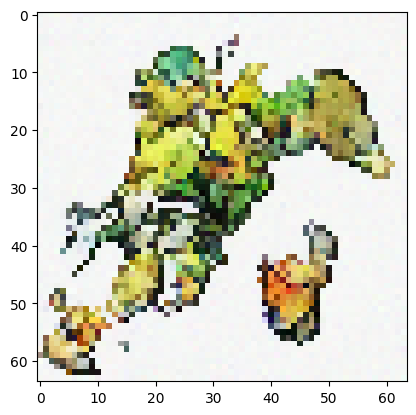

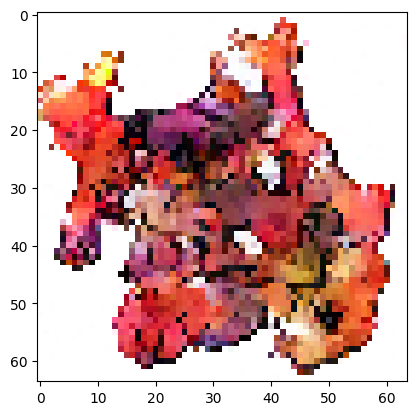

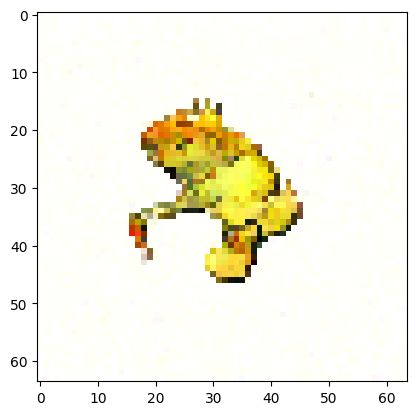

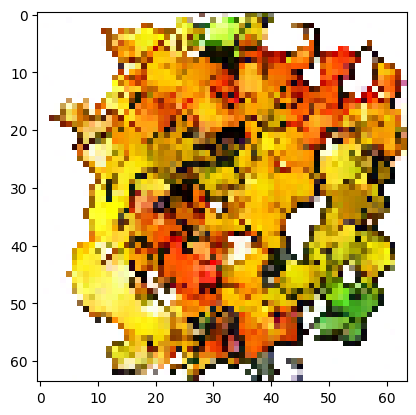

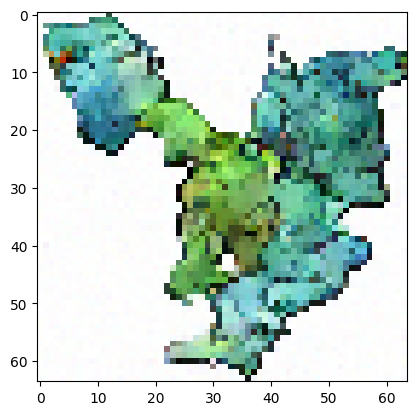

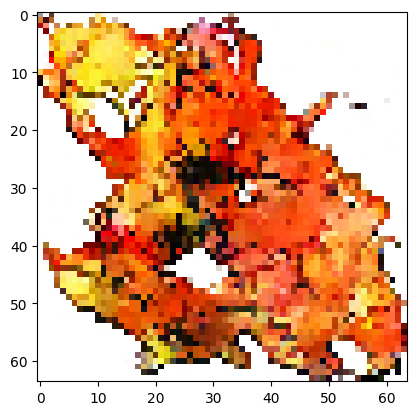

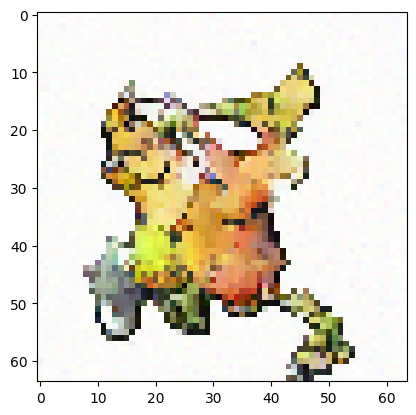

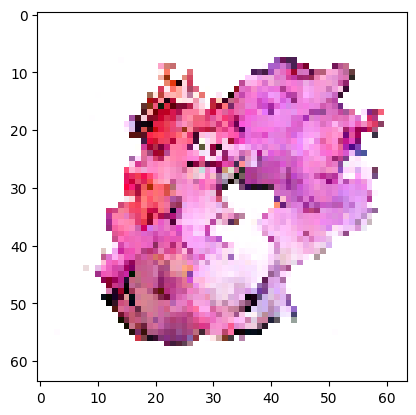

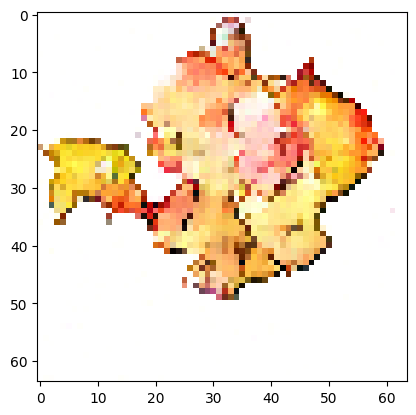

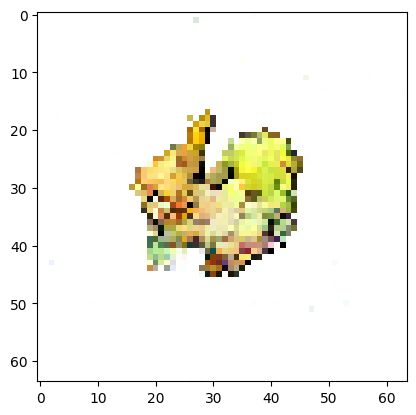

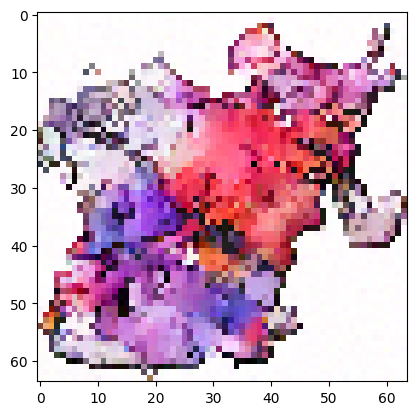

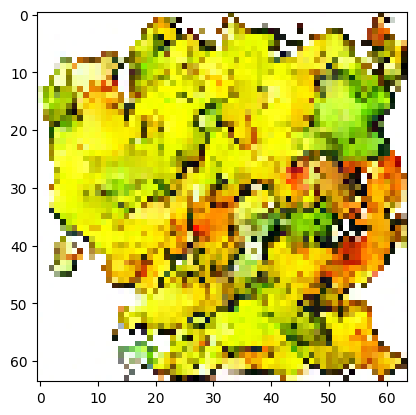

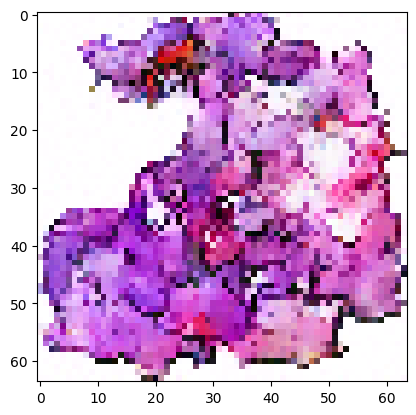

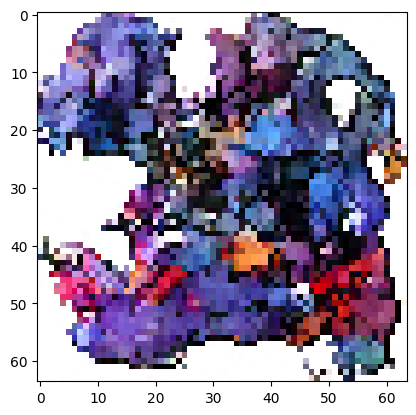

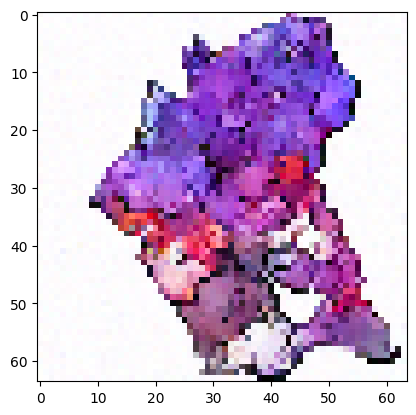

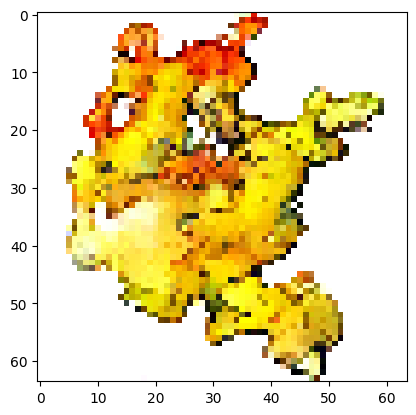

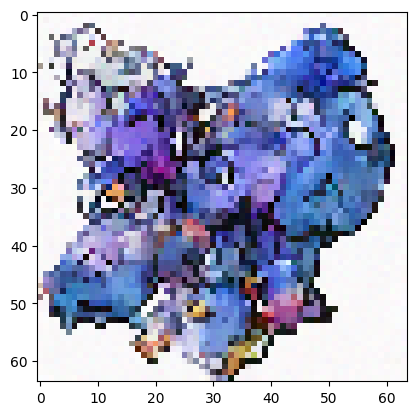

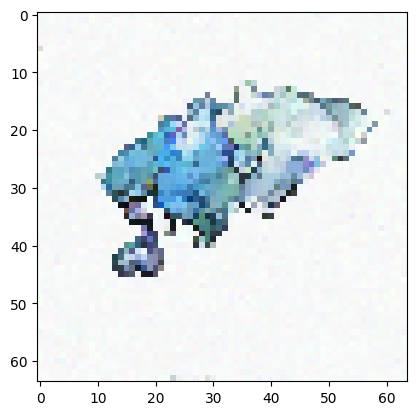

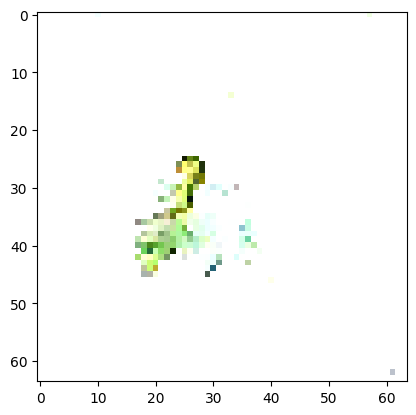

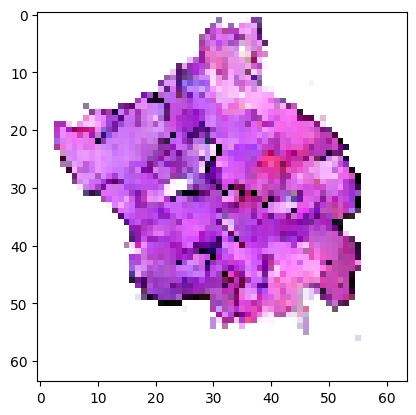

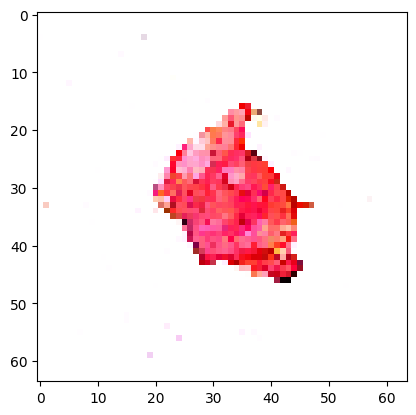

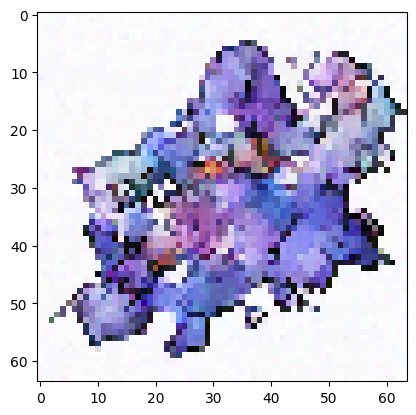

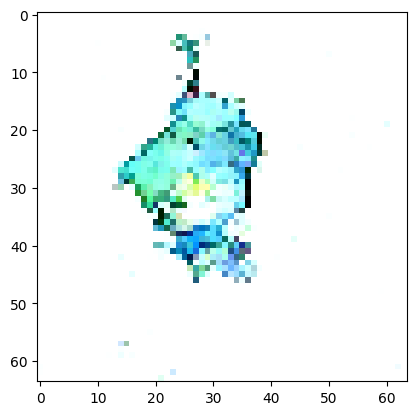

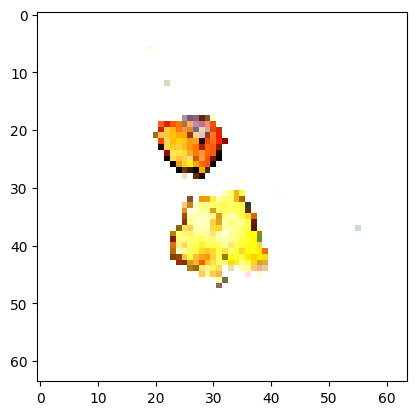

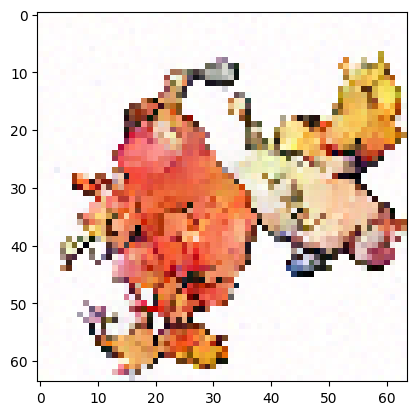

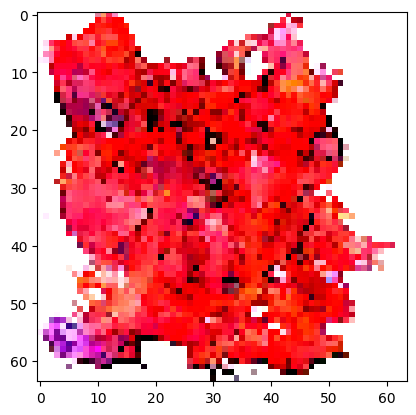

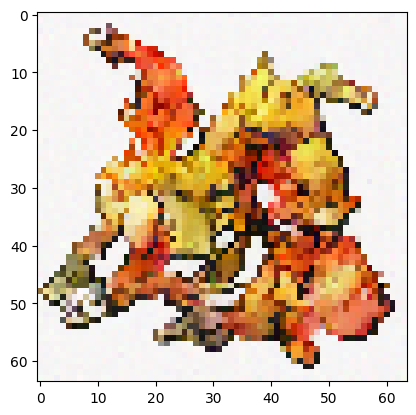

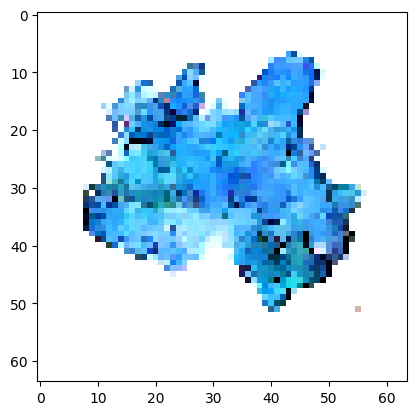

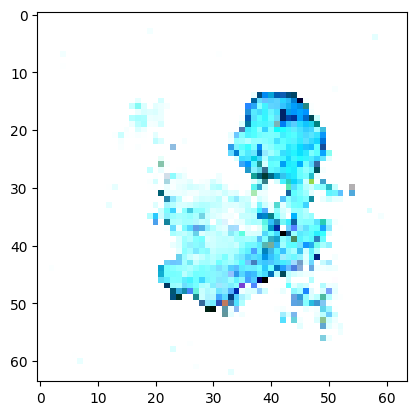

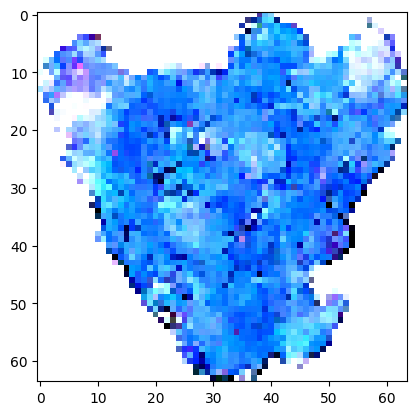

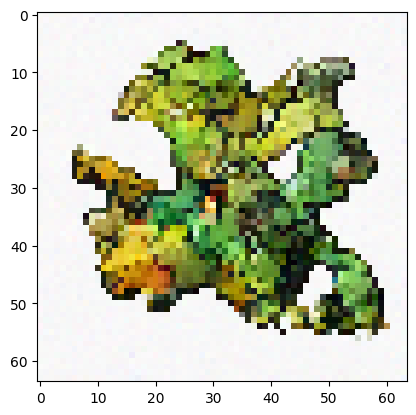

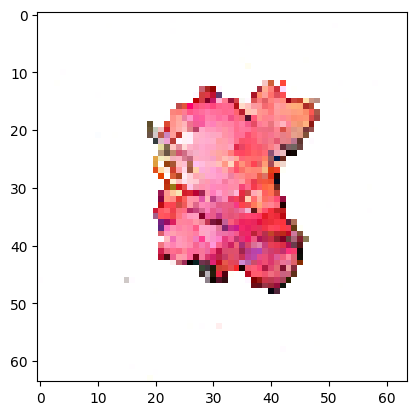

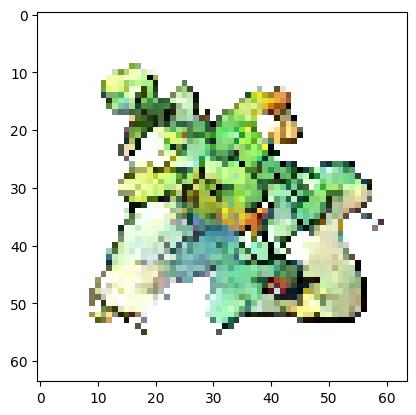

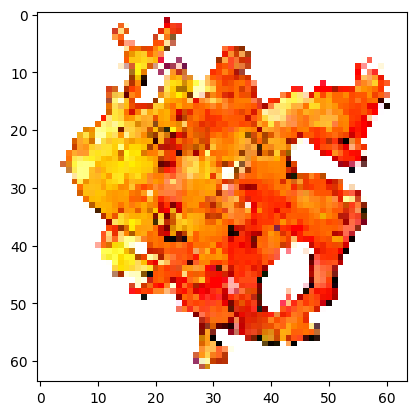

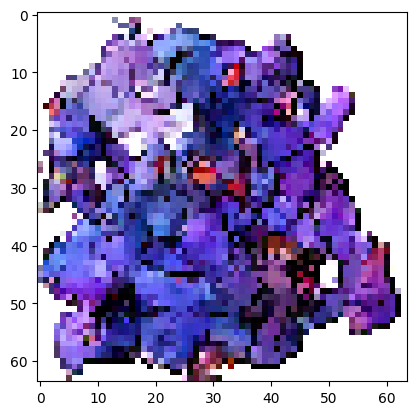

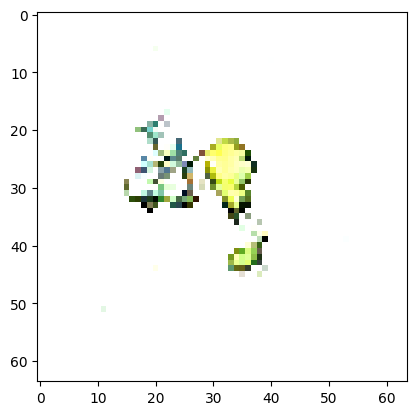

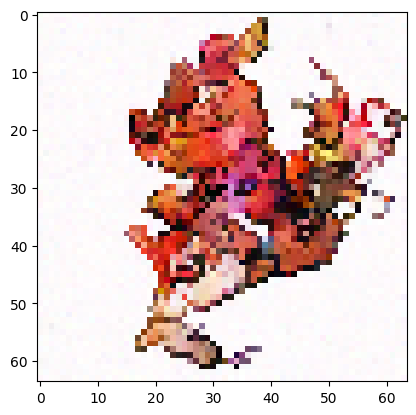

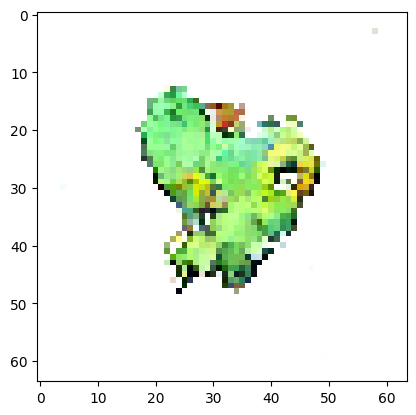

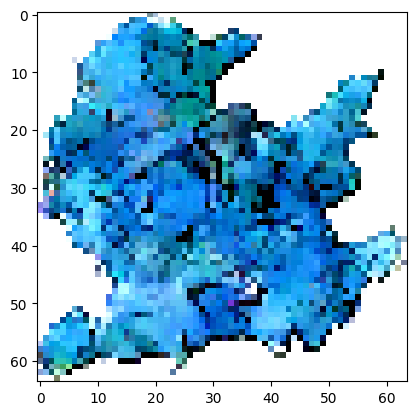

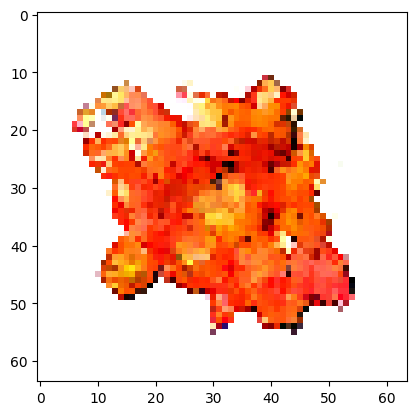

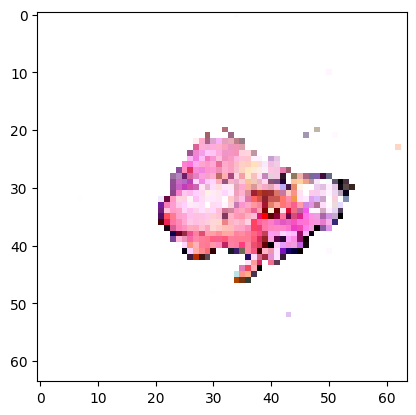

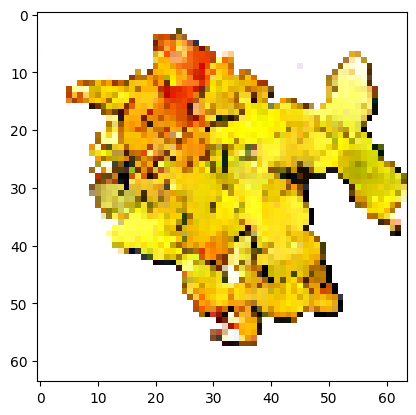

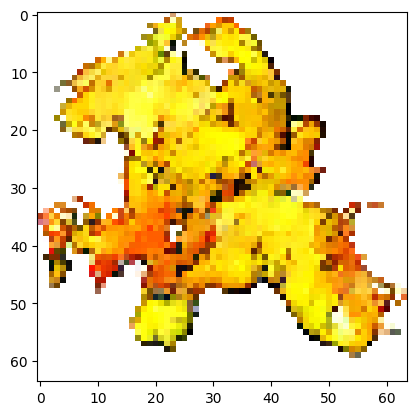

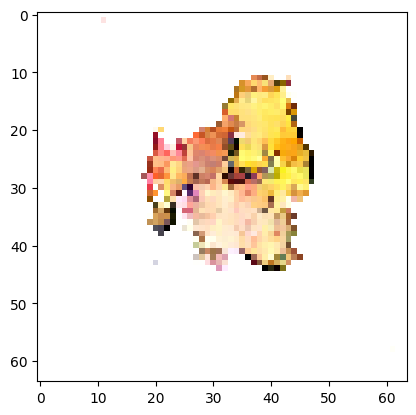

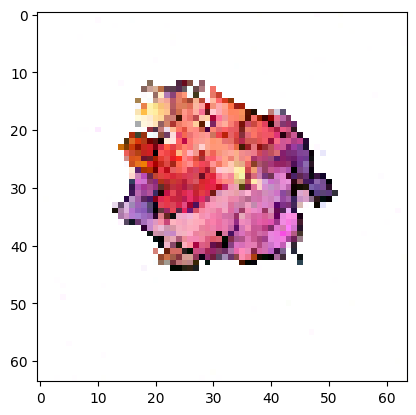

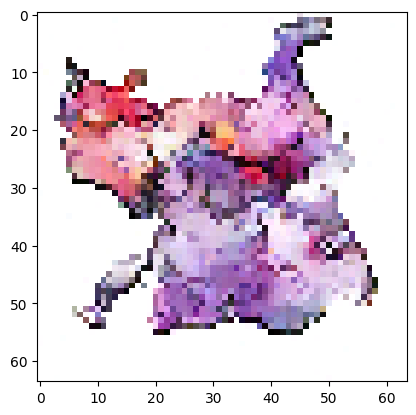

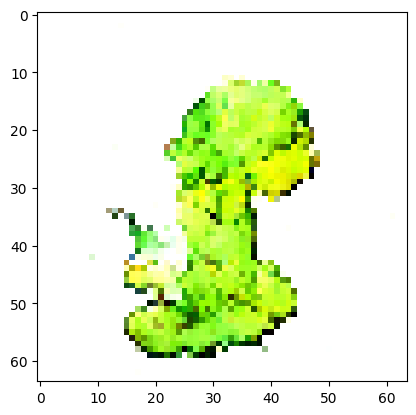

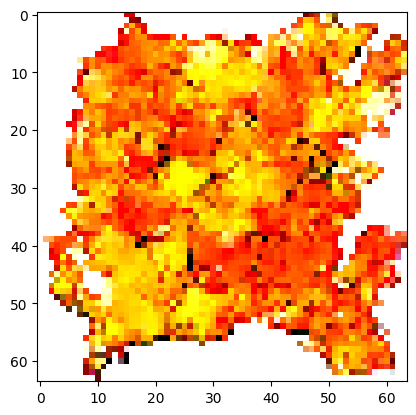

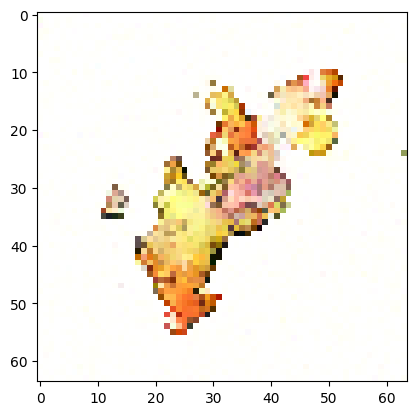

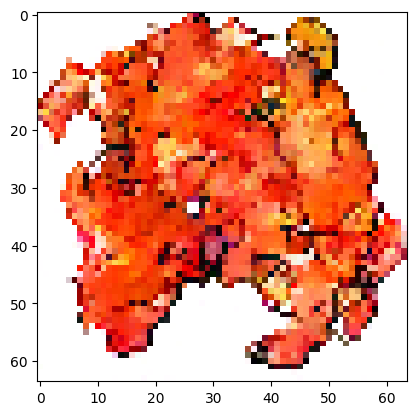

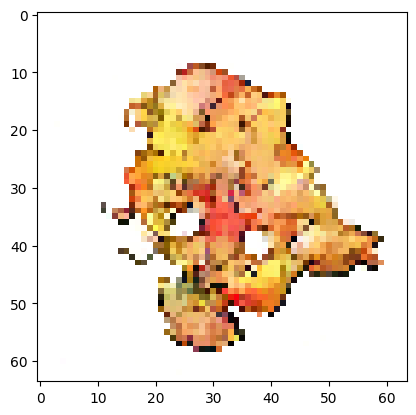

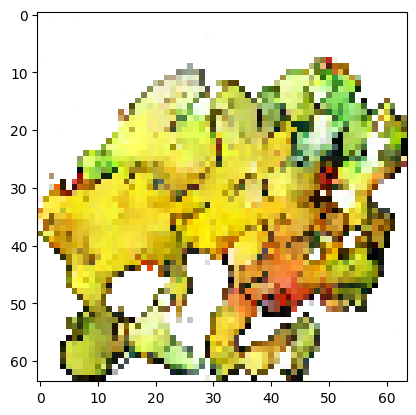

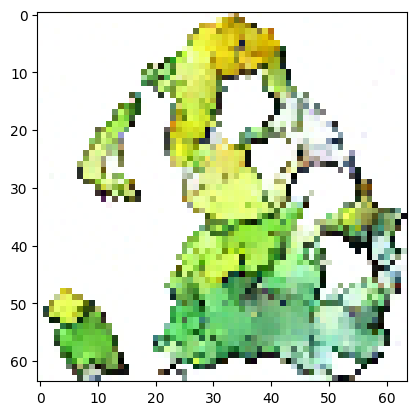

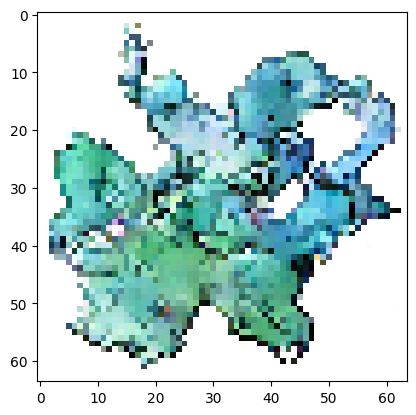

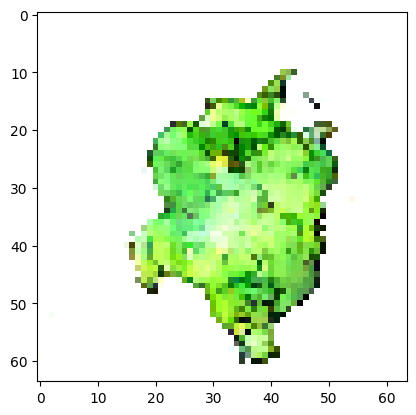

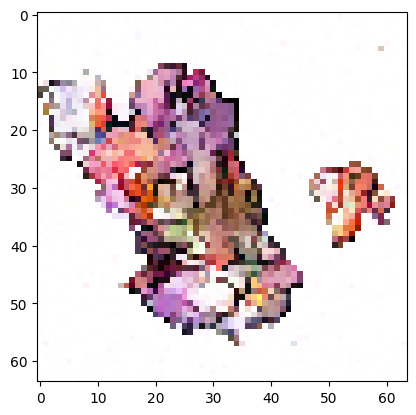

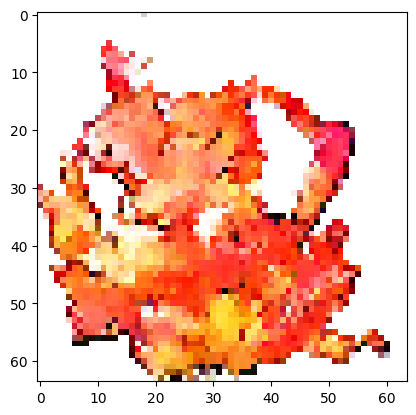

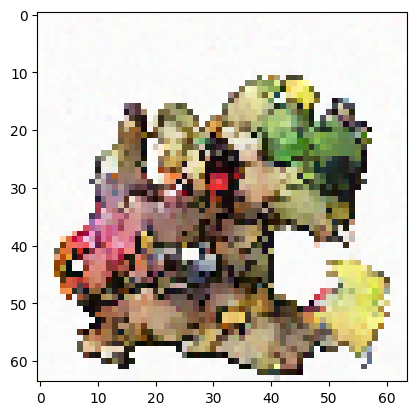

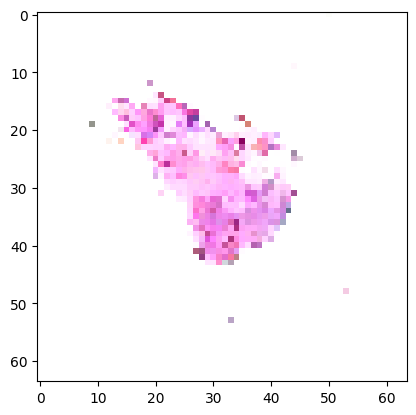

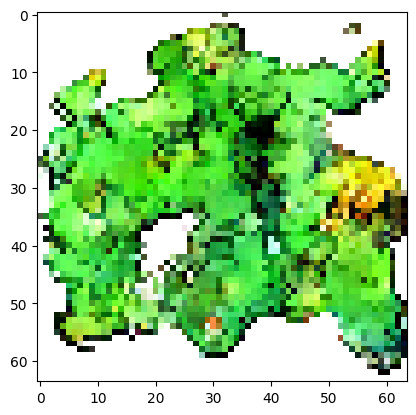

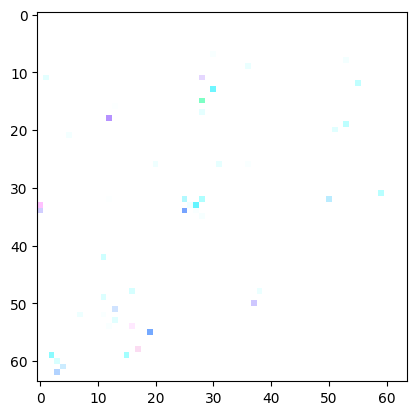

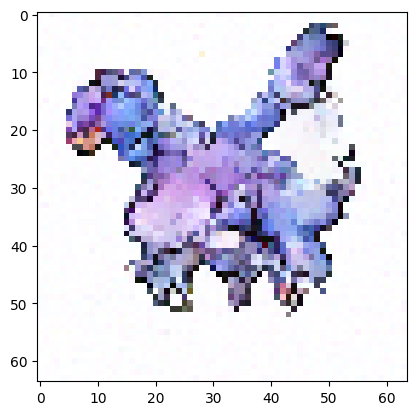

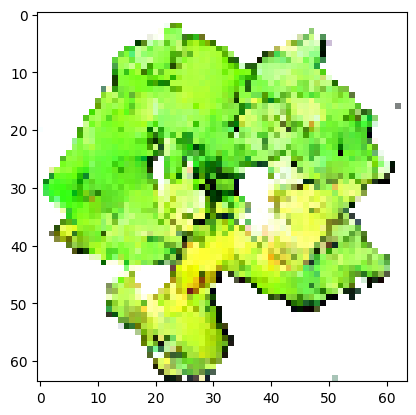

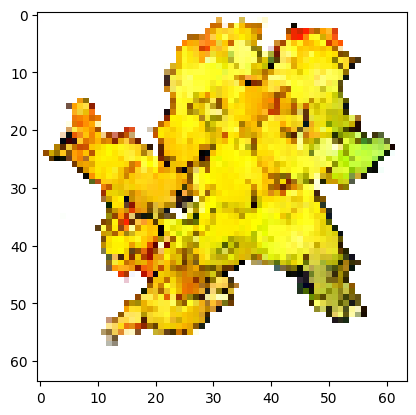

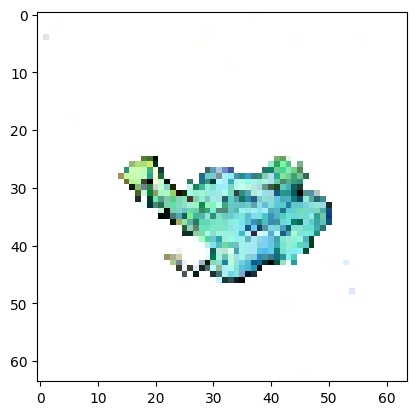

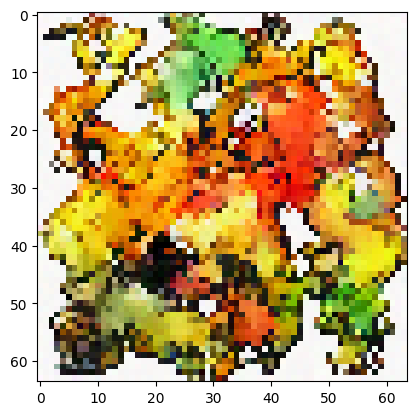

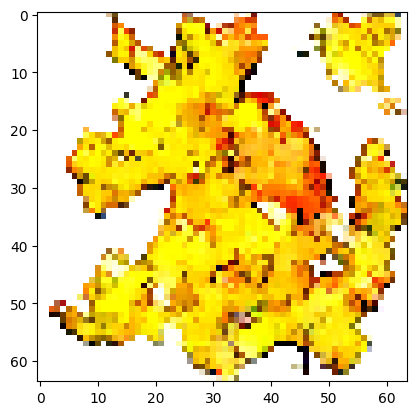

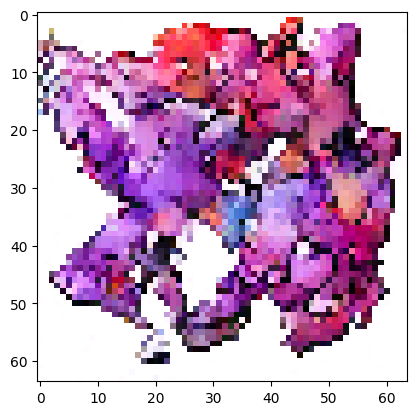

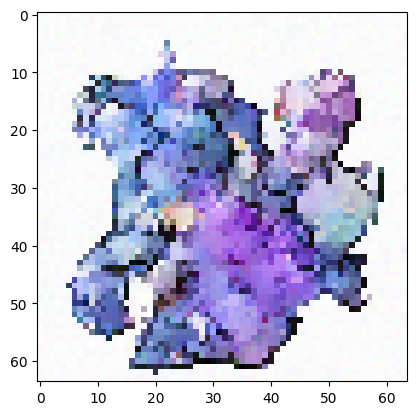

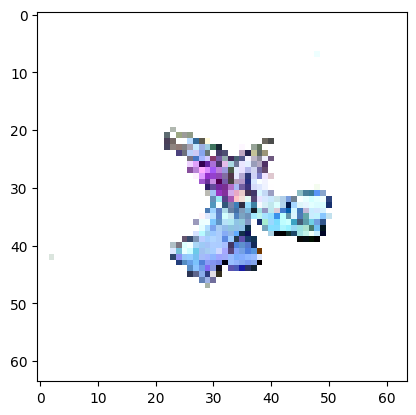

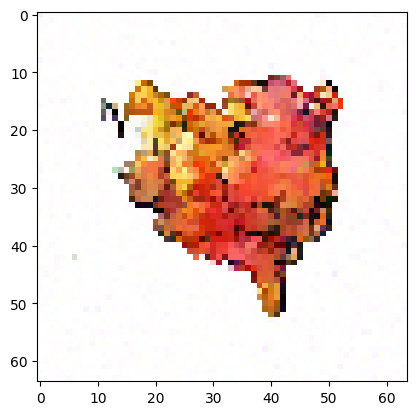

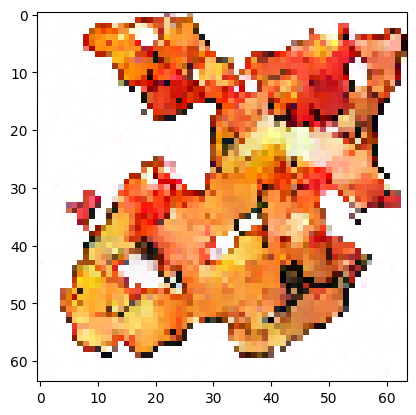

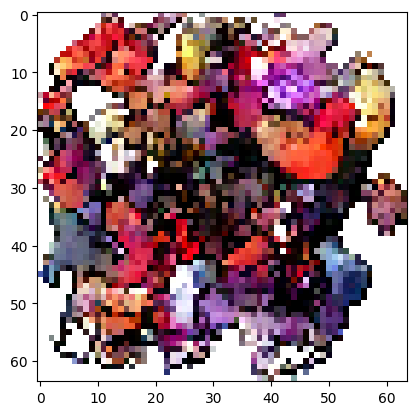

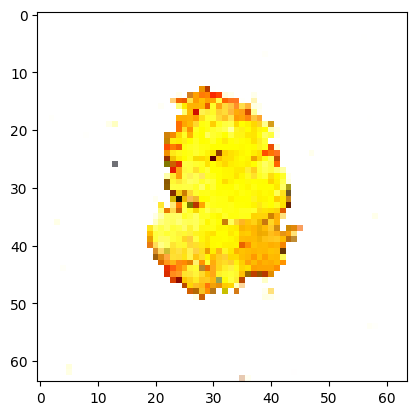

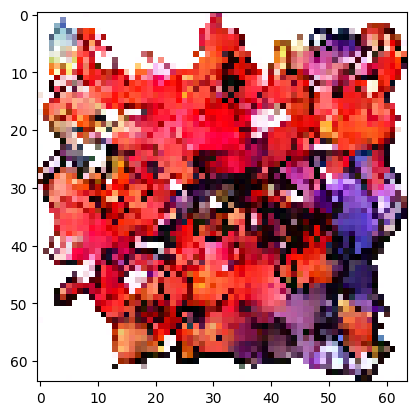

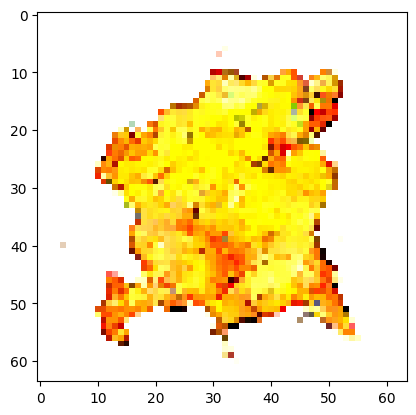

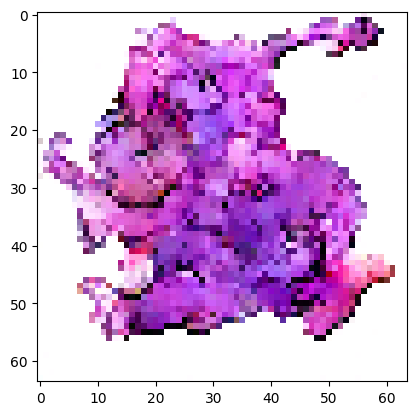

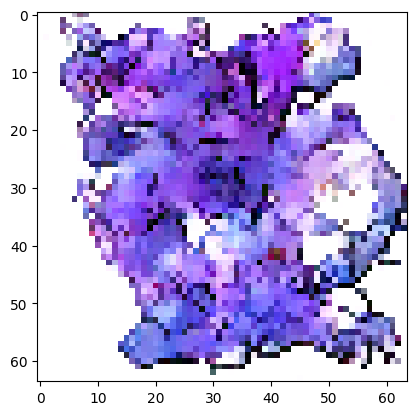

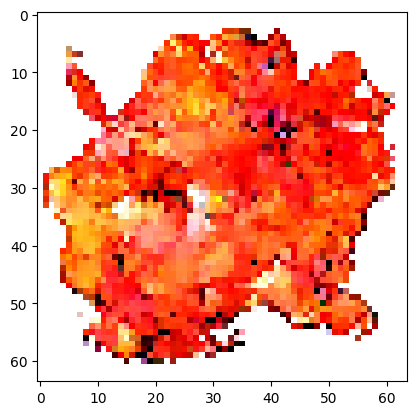

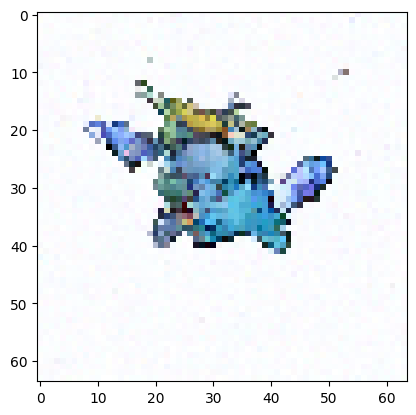

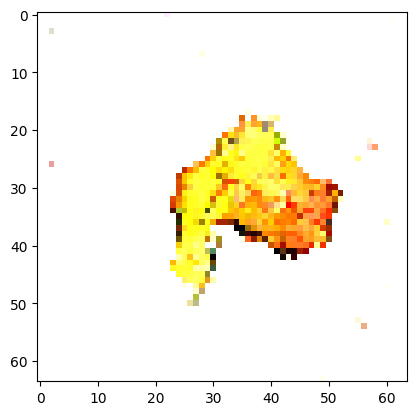

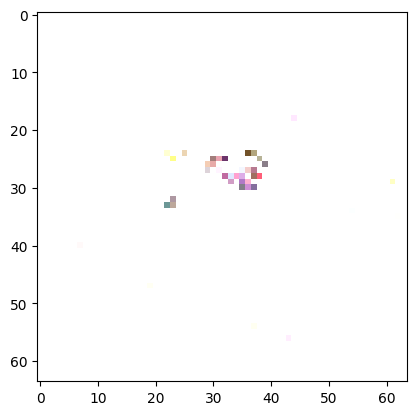

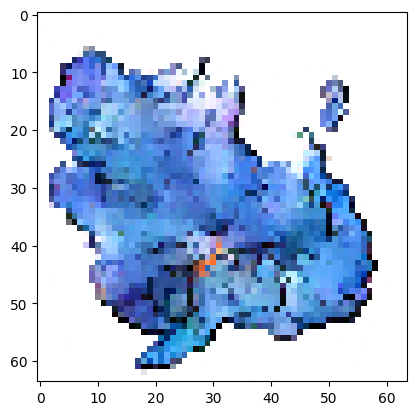

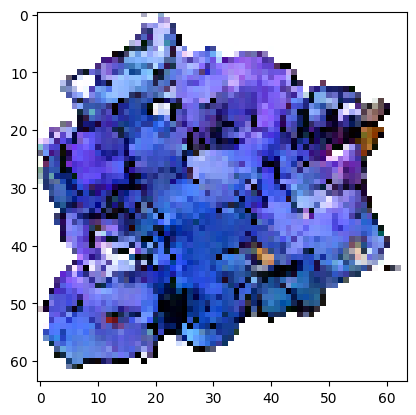

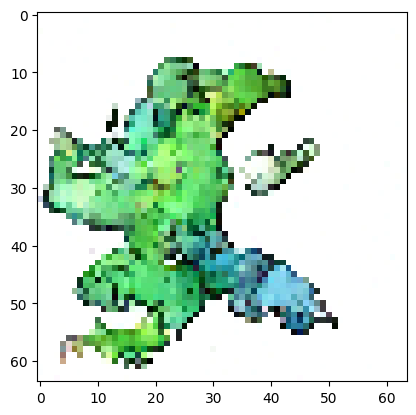

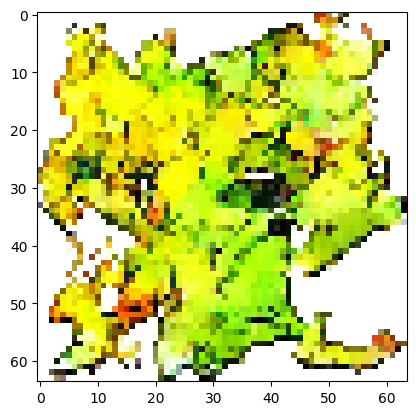

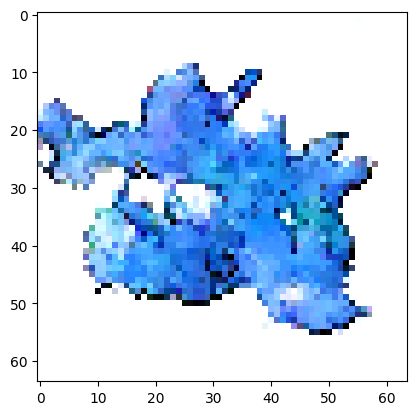

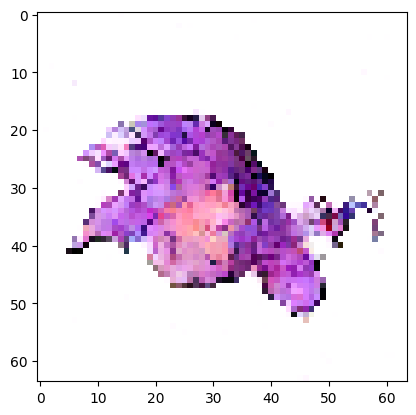

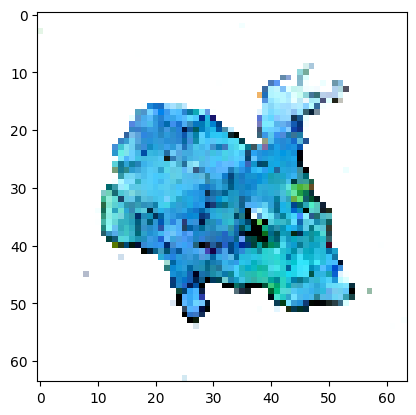

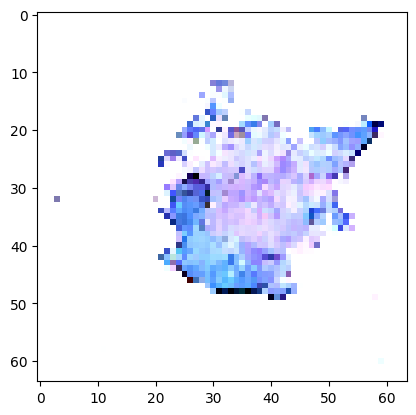

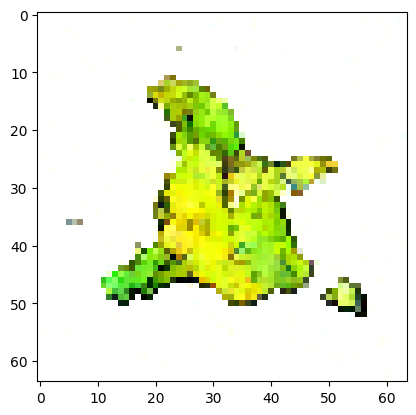

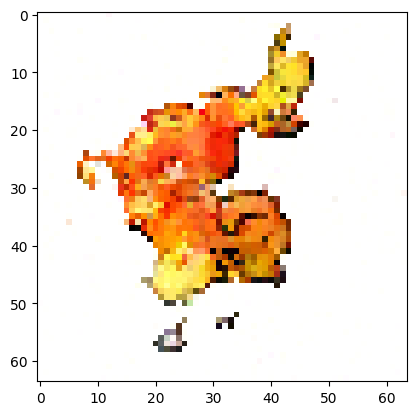

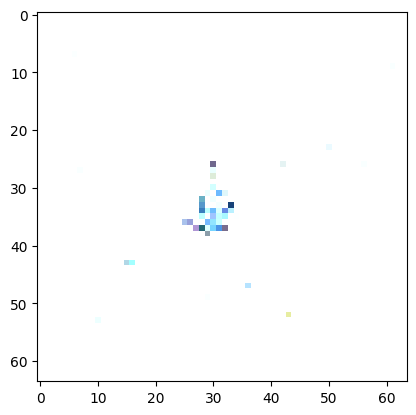

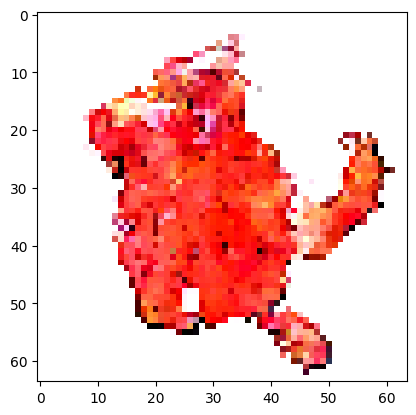

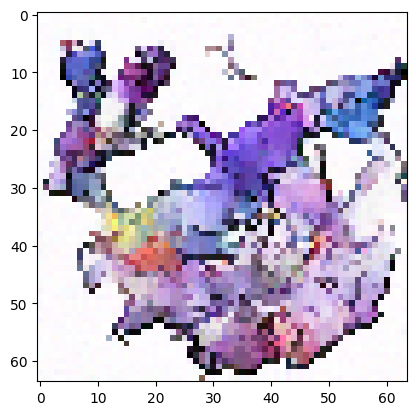

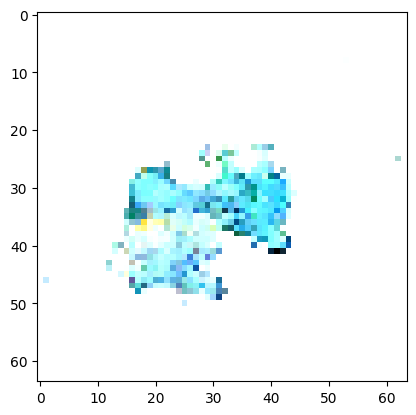

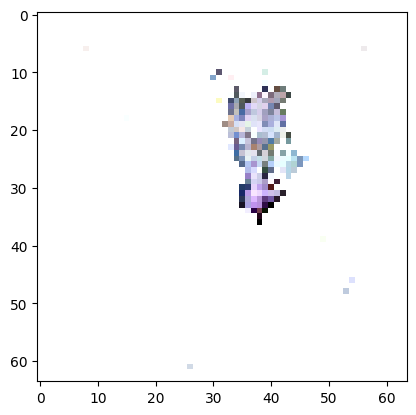

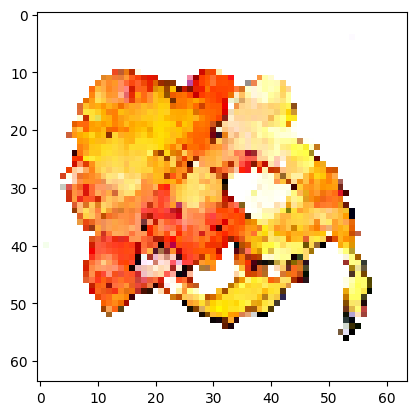

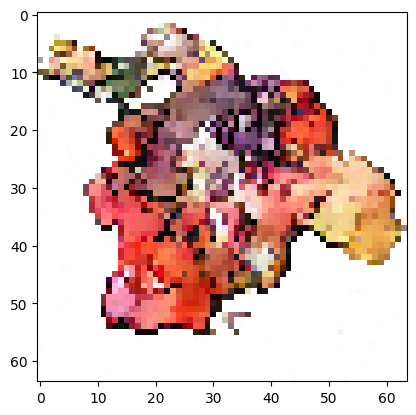

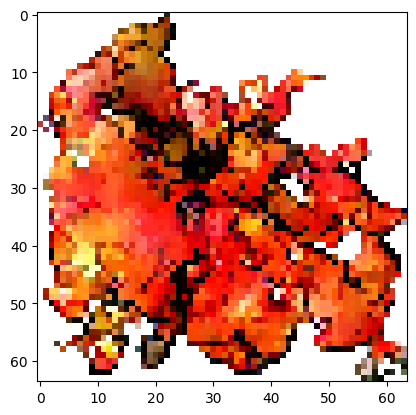

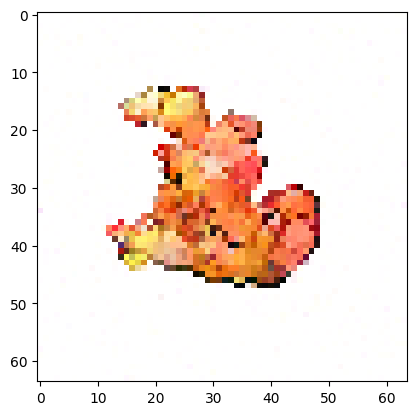

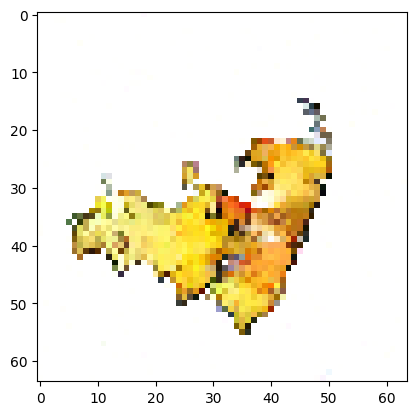

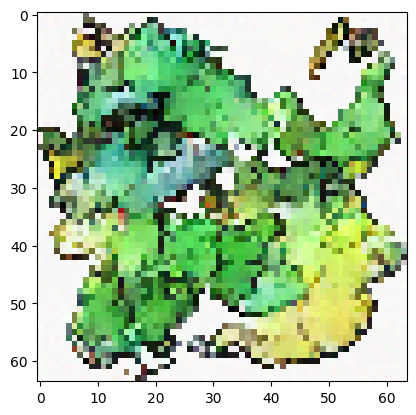

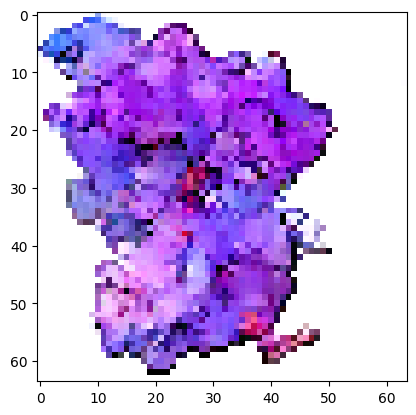

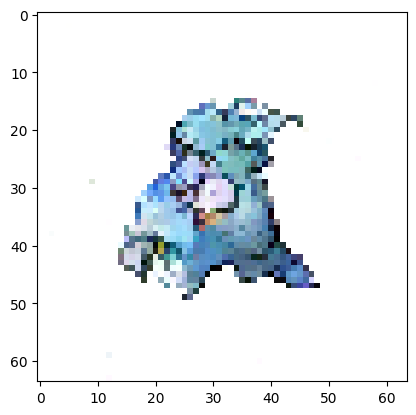

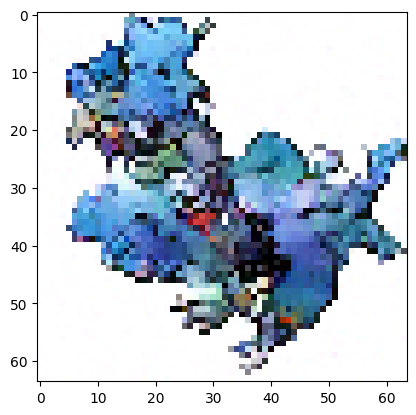

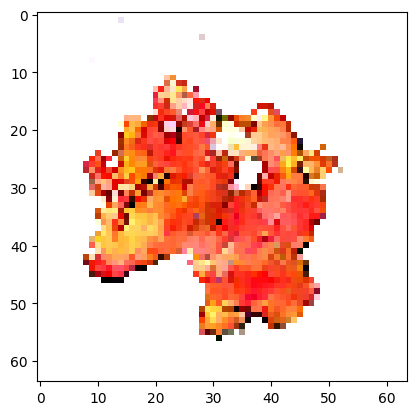

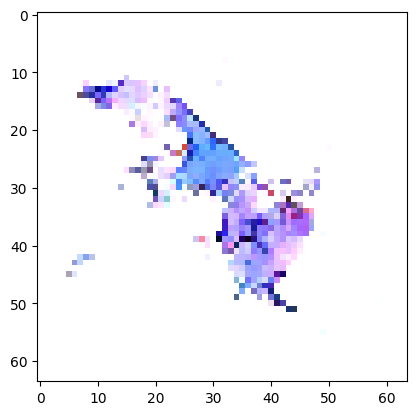

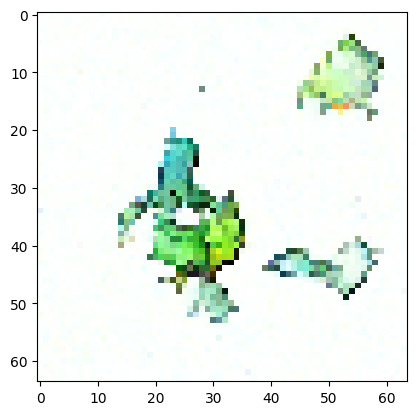

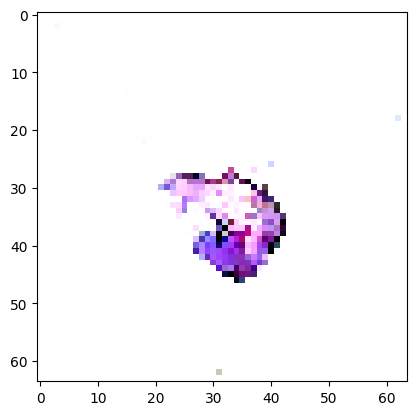

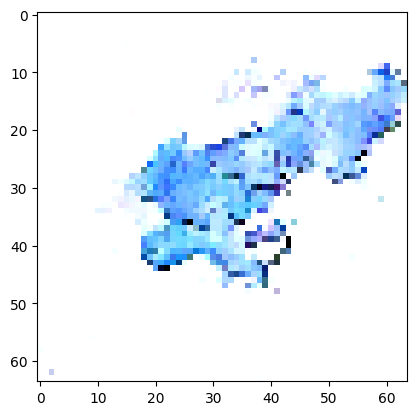

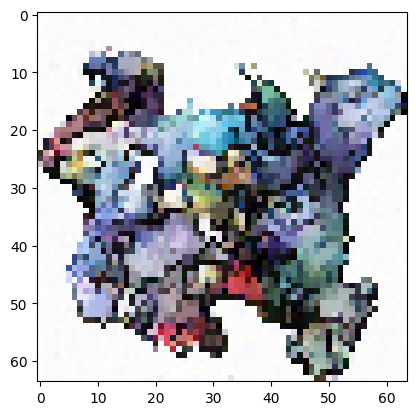

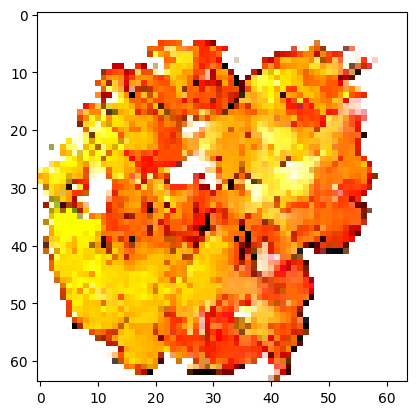

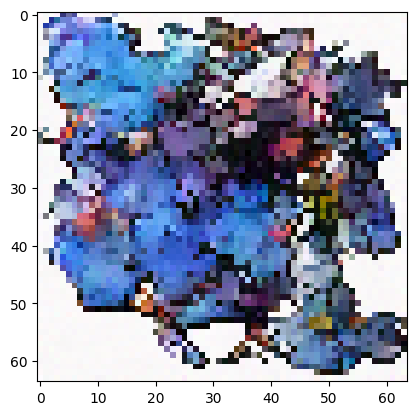

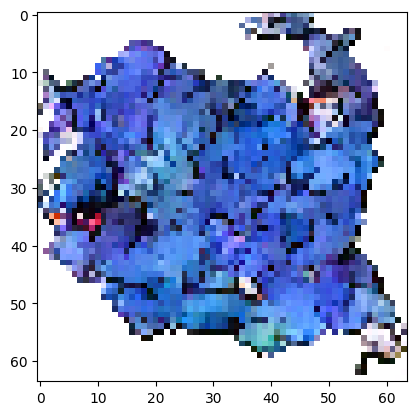

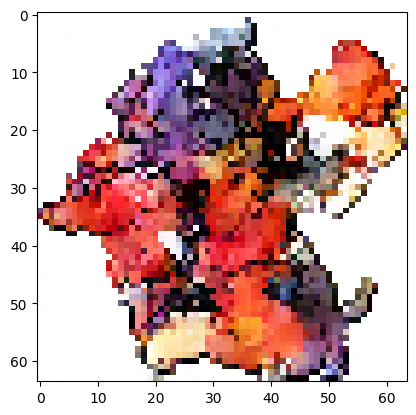

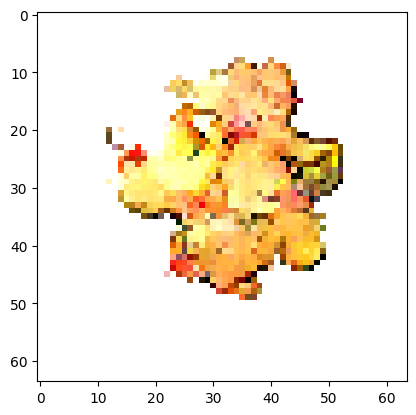

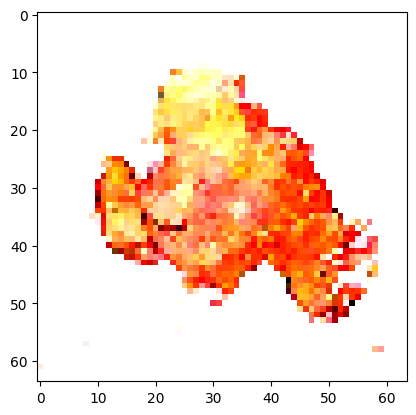

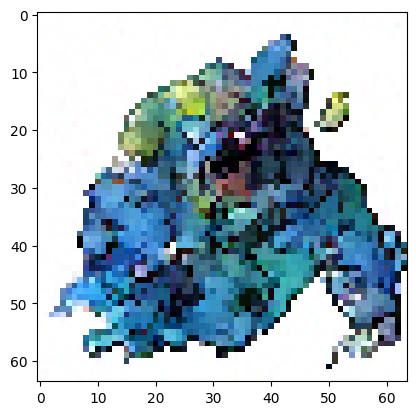

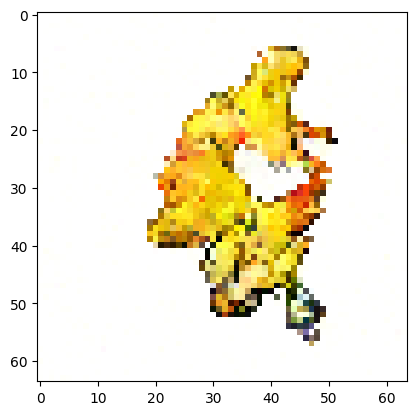

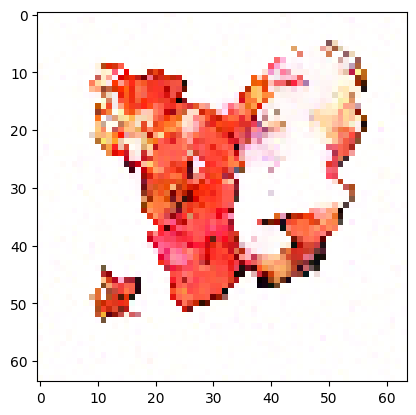

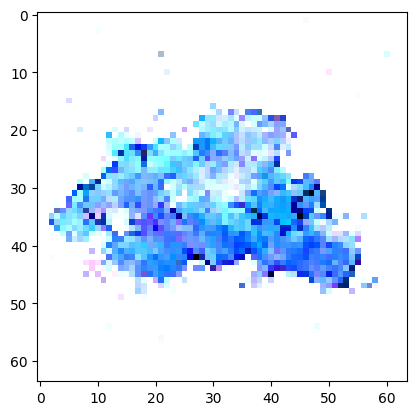

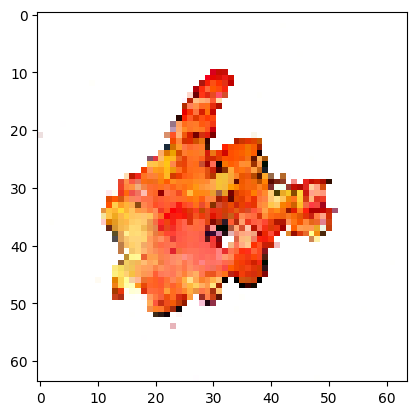

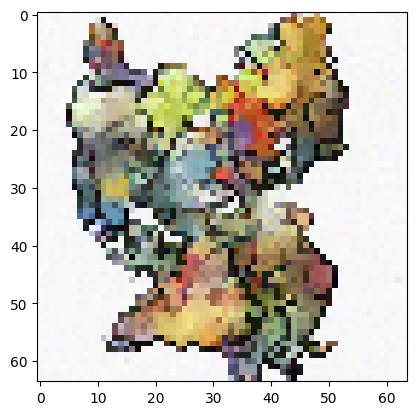

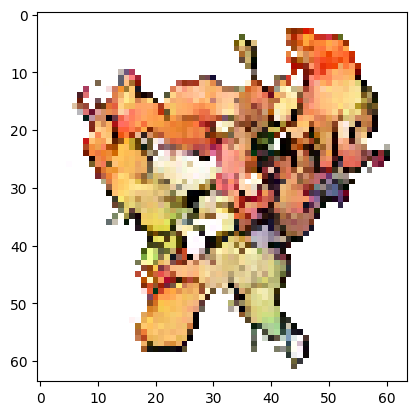

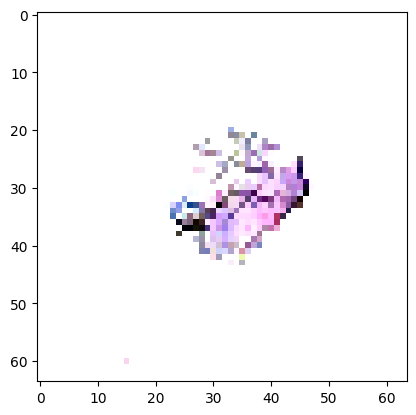

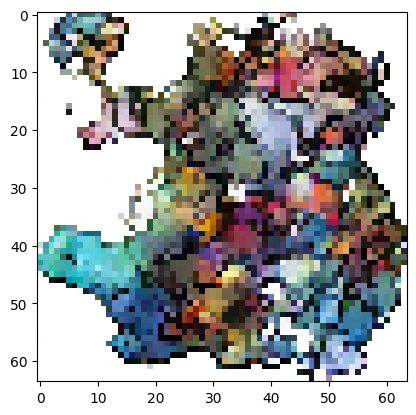

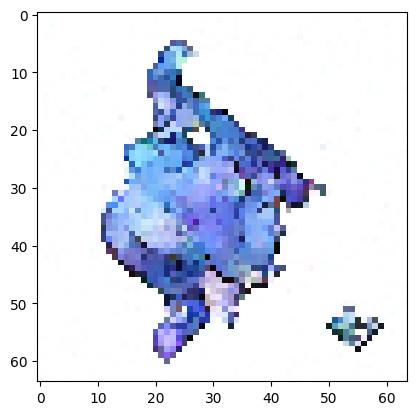

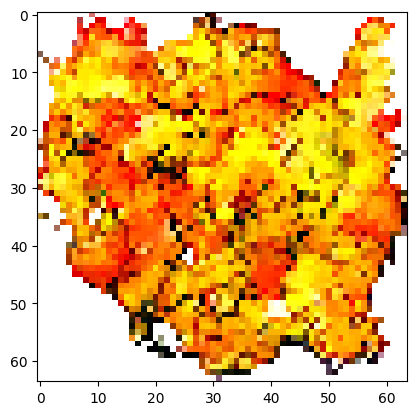

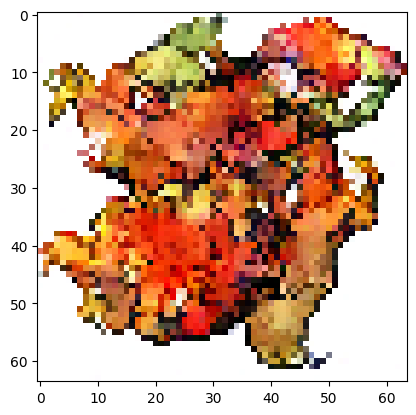

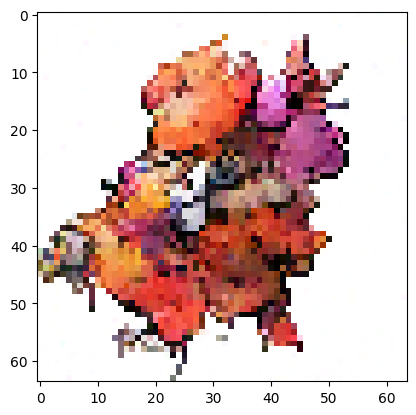

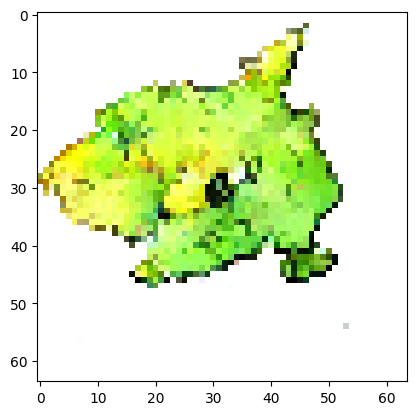

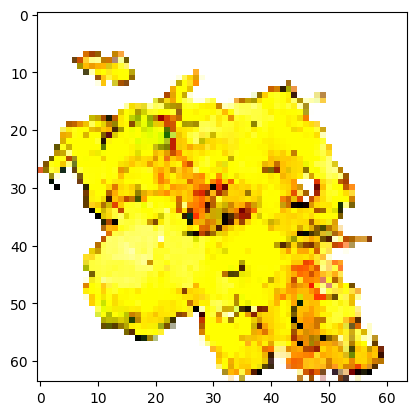

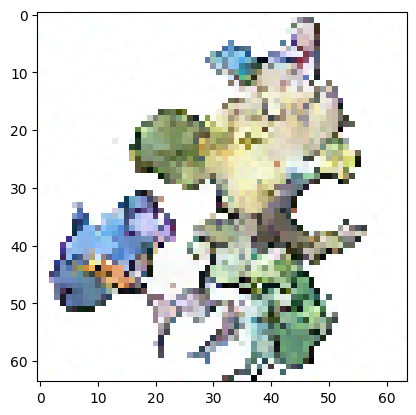

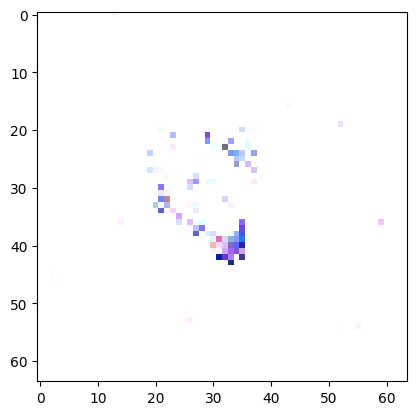

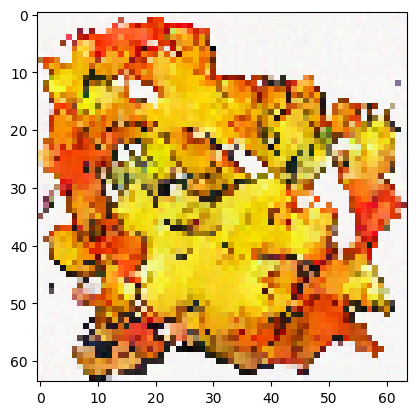

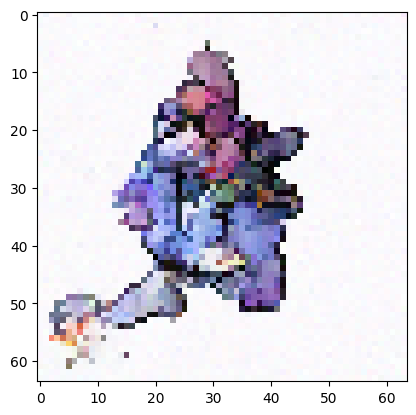

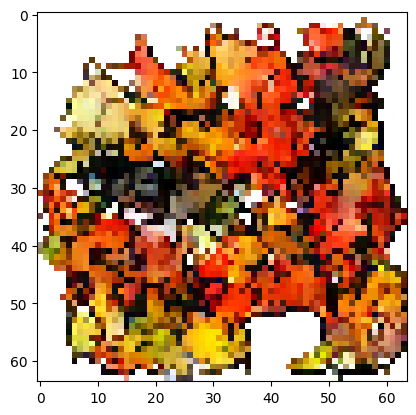

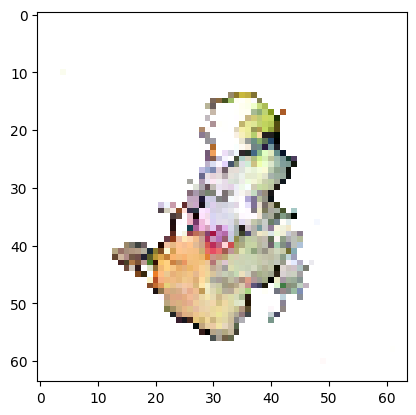

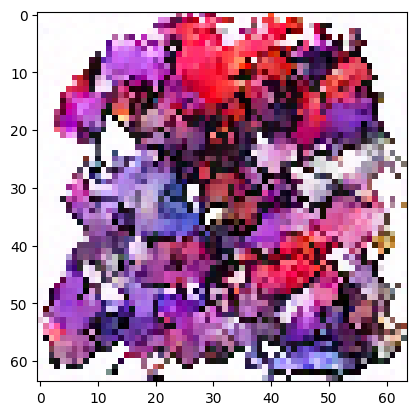

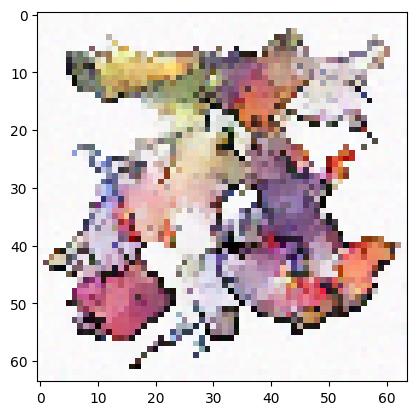

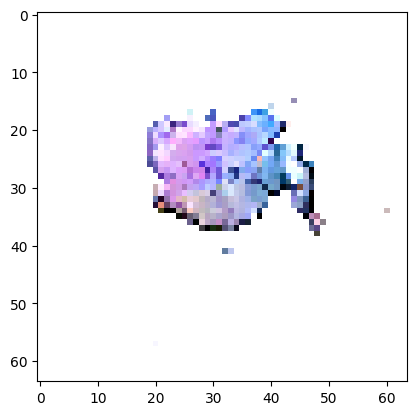

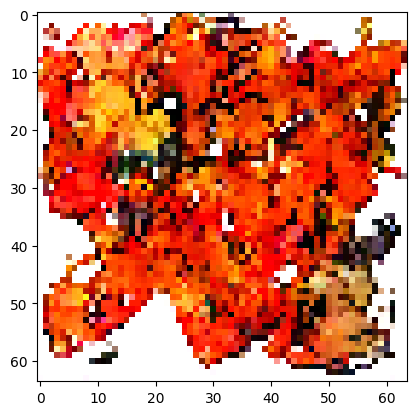

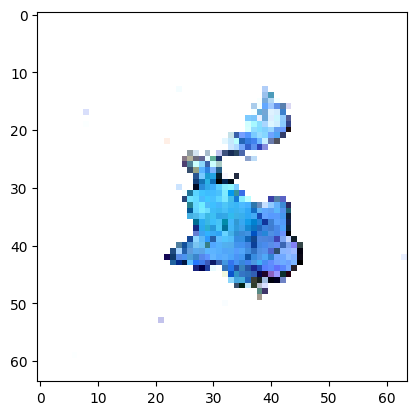

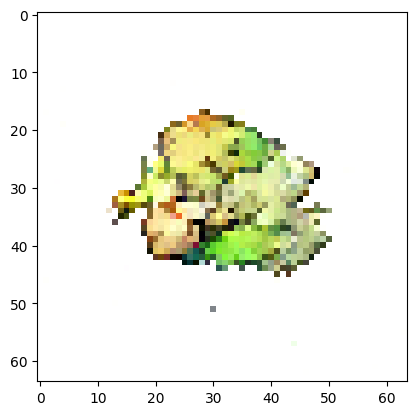

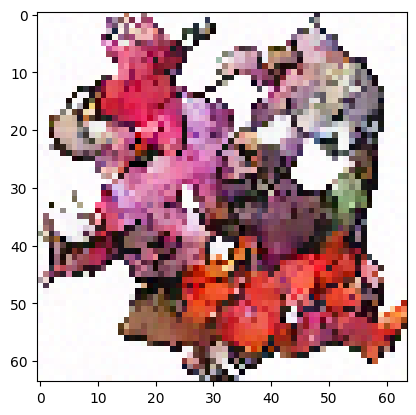

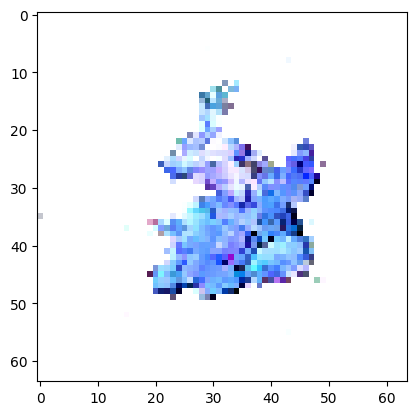

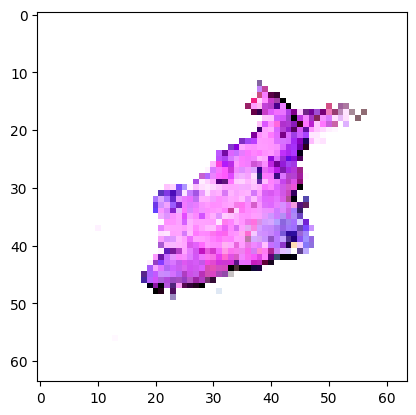

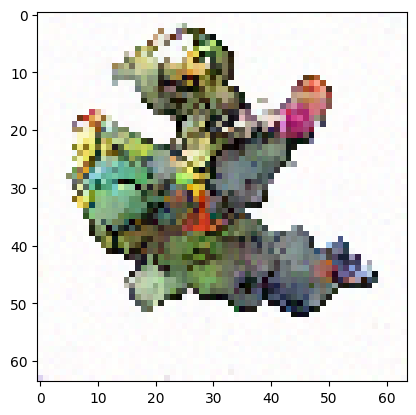

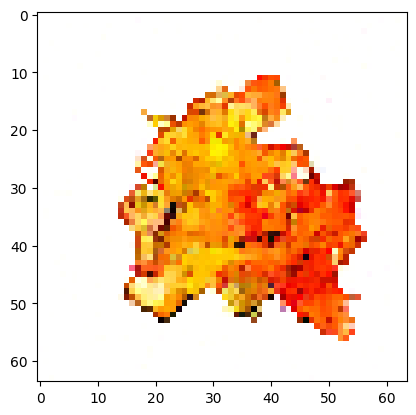

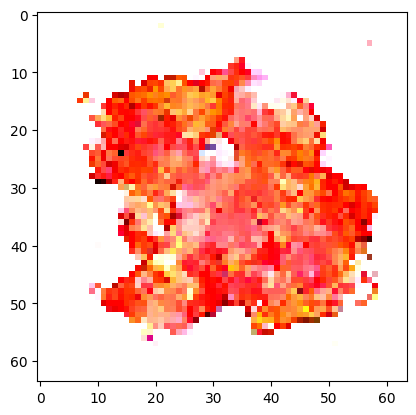

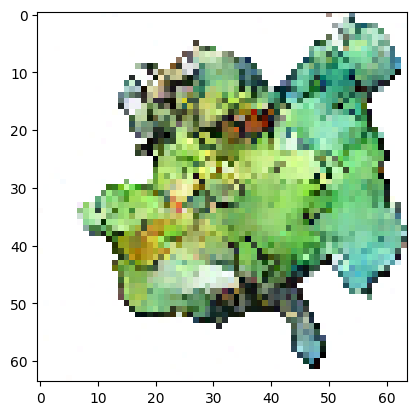

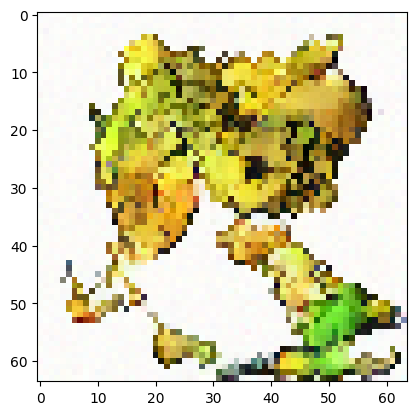

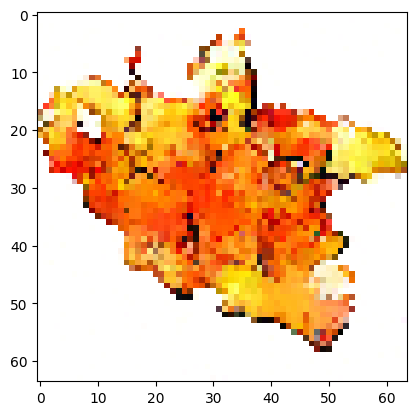

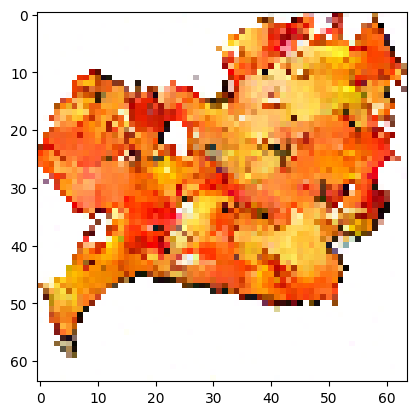

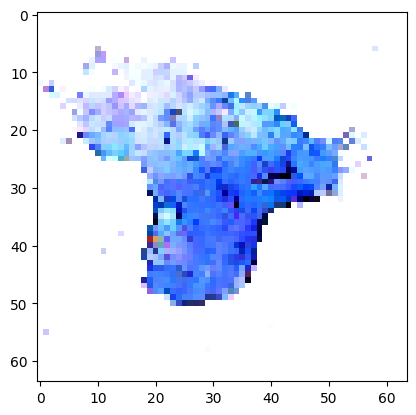

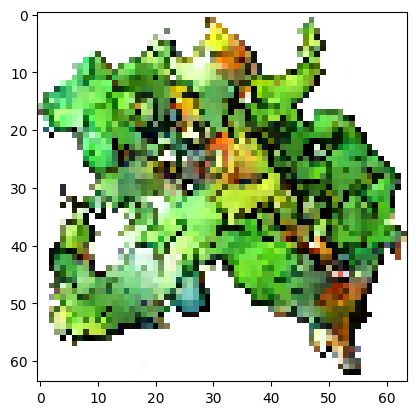

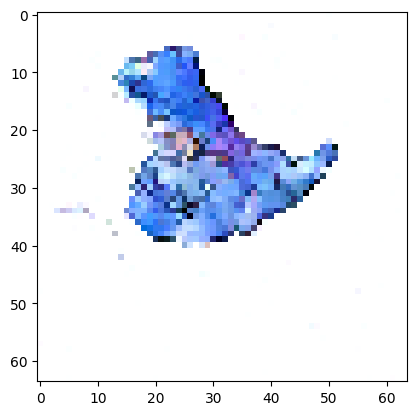

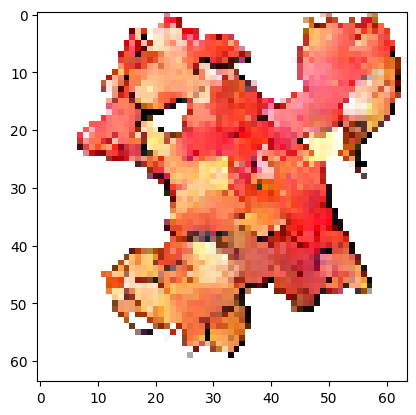

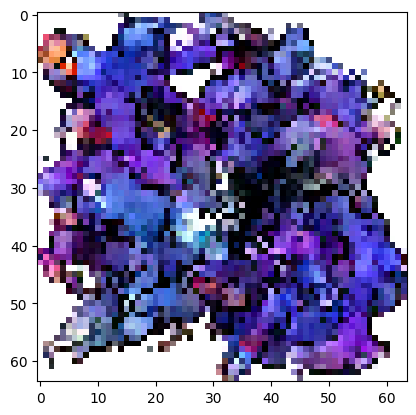

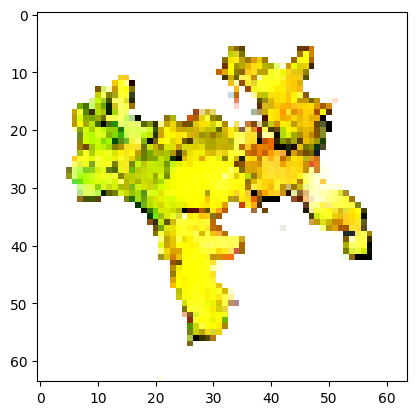

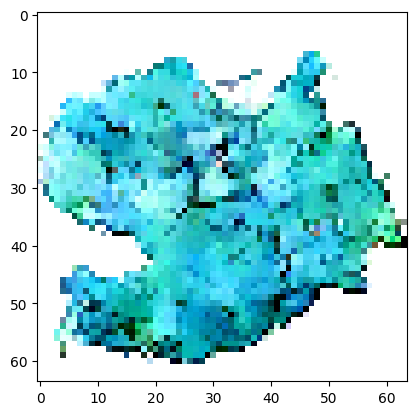

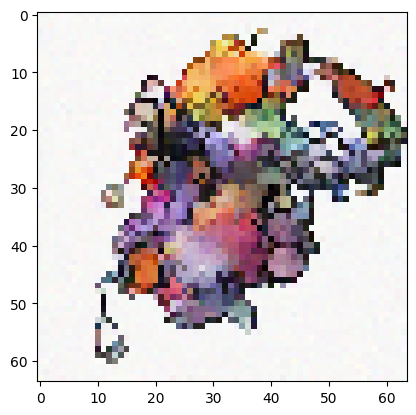

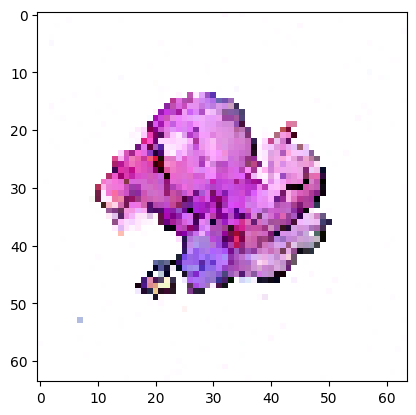

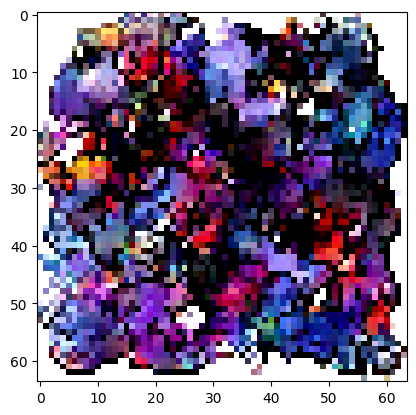

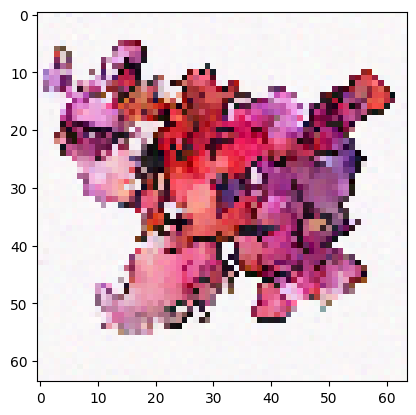

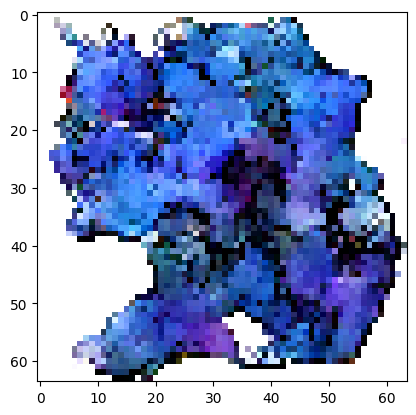

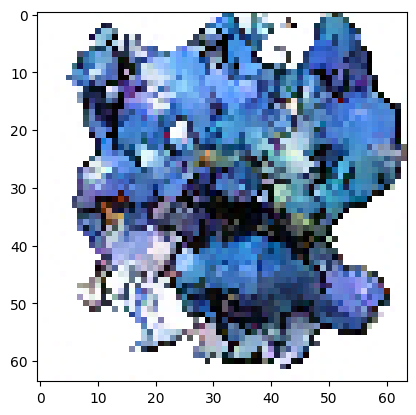

In [11]:
#models = []
#for t in range(tt):
#    models.append(torch.jit.load(f"./model_{t}.pt").eval().to(device))

for i in range(300):

    pkm = randint(0, 280)
    tt = T

    z = torch.randn((3,64,64), device=device)
    x = torch.sqrt(alpha_[tt-1]) * pimages[0][pkm] + torch.sqrt(1-alpha_[tt-1]) * z

    for t in reversed(range(tt)):

        z = torch.randn((3,64,64), device=device) 
        e = models[t](x[None])[0] * (1 - alpha[t]) / torch.sqrt(1 - alpha_[t])

        x = (1 / torch.sqrt(alpha[t])) * (x - e) + z * torch.sqrt(beta[t])

    save_image(x, f"tests/test20/{i}.png")
    plot_image(x)

In [7]:
list(range(10, 20))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]